
<h3 style="color:red;">Phase 1: Initial Data Loading, Inspection, and Univariate Exploration</h3>


## Step 0: Import Necessary Libraries

To initiate our machine learning workflow, we begin by importing all the essential libraries required for data manipulation, visualization, preprocessing, model development, and evaluation.

This foundational step ensures the environment is fully equipped for efficient data exploration, transformation, and the implementation of various machine learning algorithms in subsequent stages.

In [1]:
# Standard Library
import warnings  # To suppress unnecessary warning messages

# Data Handling and Manipulation
import pandas as pd  # For loading and manipulating datasets
import numpy as np  # For numerical computations and array handling

# Data Visualization
import matplotlib.pyplot as plt  # For basic plotting and visualization
import seaborn as sns  # For advanced statistical visualization

# Data Preprocessing
from sklearn.model_selection import train_test_split  # To split data into training and testing sets
from sklearn.preprocessing import MinMaxScaler, StandardScaler  # For feature normalization and standardization

# Model Evaluation
from sklearn.metrics import accuracy_score, classification_report  # For evaluating classification model performance

# Console Output Styling
from termcolor import colored  # For printing colored output in console

# Suppress warnings for cleaner output
warnings.filterwarnings('ignore')

# Confirmation message
print(colored("All core libraries were successfully imported.", "green", attrs=['reverse']))

# Tree-Based Models
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier

# Distance-Based Model
from sklearn.neighbors import KNeighborsClassifier  # K-Nearest Neighbors

# Probabilistic Models
from sklearn.naive_bayes import GaussianNB, BernoulliNB  # Naive Bayes classifiers

# Linear Models
from sklearn.linear_model import RidgeClassifierCV, LogisticRegression, PassiveAggressiveClassifier

# Margin-Based Model
from sklearn.svm import SVC  # Support Vector Classifier

# Neural Network Model
from sklearn.neural_network import MLPClassifier  # Multi-layer Perceptron

# Discriminant Analysis Models
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis

# Boosting Libraries
from xgboost import XGBClassifier  # Extreme Gradient Boosting
from lightgbm import LGBMClassifier  # Light Gradient Boosting Machine
from catboost import CatBoostClassifier  # Categorical Boosting

# Confirmation message for model imports
print(colored("All classification models were successfully imported.", "green", attrs=['reverse']))


All core libraries were successfully imported.
All classification models were successfully imported.


### Step 1: Dataset Loading

The dataset is loaded using `pandas.read_csv()` with error handling to ensure smooth data ingestion and informative feedback on success or failure.

In [2]:
# Define file path
# The "r" in front of the string makes it a "raw string".  It tells Python to treat backslashes (\) in the string as normal characters, not special ones.
file_path = r'loan_data_set.csv'

try:
    # Load the dataset into a pandas DataFrame
    # Read the CSV file and save it in "loan_data" variable
    loan_data = pd.read_csv(file_path)
    
    # Printing the DataFrame
    print(loan_data)
    
    # Print a success message
    print(colored("THE DATASET LOADED SUCCESSFULLY...", "green", attrs=['reverse']))

except FileNotFoundError:
    # Handle file not found error
    print(colored("ERROR: File not found!", "red", attrs=['reverse']))

except Exception as e:
    # Handle other exceptions
    print(colored(f"ERROR: {e}", "red", attrs=['reverse']))

      Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001002    Male      No          0      Graduate            No   
1    LP001003    Male     Yes          1      Graduate            No   
2    LP001005    Male     Yes          0      Graduate           Yes   
3    LP001006    Male     Yes          0  Not Graduate            No   
4    LP001008    Male      No          0      Graduate            No   
..        ...     ...     ...        ...           ...           ...   
609  LP002978  Female      No          0      Graduate            No   
610  LP002979    Male     Yes         3+      Graduate            No   
611  LP002983    Male     Yes          1      Graduate            No   
612  LP002984    Male     Yes          2      Graduate            No   
613  LP002990  Female      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849                0.0         NaN           

### Step 2: Previewing Dataset Rows

The first 7 rows of the dataset are displayed using `head()` and `iterrows()` to provide a clear, row-wise overview of the loan data, with structured and labeled output.


In [3]:
# Displaying the first 7 rows.
loan_data_rows = loan_data.head(7)  # .head() the default value = 5

print(colored('As you can see, the first 7 rows in the dataset:\n', 'green', attrs=['reverse']))
#print(loan_data_rows)

# Iterate over each row in the loan_data_rows DataFrame
for index, row in loan_data_rows.iterrows():
    # Print the index label of the current row, "index + 1" start with 1 not 0 
    print(colored(f"Row {index + 1}:", "white", attrs=['reverse']))
    
    # Print the content of the current row
    print(row)
    
    # Print a separator line
    print("--------------------------------------")


# .iterrows() function:
# Returns: (index, data|row|series)
#     Index: the index of the row.
#     Data: the data of the row as a series.
# Note: The column names will also be returned, in addition to the specified rows.

As you can see, the first 7 rows in the dataset:

Row 1:
Loan_ID              LP001002
Gender                   Male
Married                    No
Dependents                  0
Education            Graduate
Self_Employed              No
ApplicantIncome          5849
CoapplicantIncome         0.0
LoanAmount                NaN
Loan_Amount_Term        360.0
Credit_History            1.0
Property_Area           Urban
Loan_Status                 Y
Name: 0, dtype: object
--------------------------------------
Row 2:
Loan_ID              LP001003
Gender                   Male
Married                   Yes
Dependents                  1
Education            Graduate
Self_Employed              No
ApplicantIncome          4583
CoapplicantIncome      1508.0
LoanAmount              128.0
Loan_Amount_Term        360.0
Credit_History            1.0
Property_Area           Rural
Loan_Status                 N
Name: 1, dtype: object
--------------------------------------
Row 3:
Loan_ID              LP00

### Step 3: Understanding Dataset Dimensions

The code retrieves and displays the dataset's shape, including total rows, columns, features (excluding the target), and the total number of data points to assess dataset size and structure.


In [4]:
# Show the shape of the dataset
print("The shape =", loan_data.shape)

# Dataset dimensions and statistics
num_rows, num_cols = loan_data.shape
num_features = num_cols - 1
num_data = num_rows * num_cols

# Print the information about the dataset
print(f"Number of Rows: {num_rows}")
print(f"Number of Columns: {num_cols}")
print(f"Number of Features: {num_features}")
print(f"Number of All Data: {num_data}")

# Check and ensure running
print(colored("The task has been completed without any errors....", "green", attrs=['reverse']))

The shape = (614, 13)
Number of Rows: 614
Number of Columns: 13
Number of Features: 12
Number of All Data: 7982
The task has been completed without any errors....


### Step 4: Dataset Metadata Overview

This step retrieves essential metadata about the dataset, including column names, data types, and non-null value counts — useful for identifying data types and missing values early in the pipeline.


In [5]:
# Get basic information from dataset like "Column names", "Data types" and "Non-null values counts"
print(loan_data.info())

# Check and ensure running
print(colored("The task has been completed without any errors....", "green", attrs=['reverse']))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB
None
The task has been completed without any errors....


### Step 5: Descriptive Statistics of Numeric Variables

This step provides a statistical summary (mean, std, min, max, quartiles) for all numerical columns in the dataset, offering insights into data distribution and scale.


In [6]:
# Descriptive Statistics of Numeric Variables only.
loan_data.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,614.0,5403.46,6109.04,150.0,2877.5,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1621.25,2926.25,0.0,0.0,1188.5,2297.25,41667.0
LoanAmount,592.0,146.41,85.59,9.0,100.0,128.0,168.00,700.0
Loan_Amount_Term,600.0,342.00,65.12,12.0,360.0,360.0,360.00,480.0
Credit_History,564.0,0.84,0.36,0.0,1.0,1.0,1.00,1.0


### Step 6: Descriptive Analysis of Categorical Variables

This step summarizes the categorical features, showing count, unique values, top (most frequent) category, and its frequency—helpful for understanding class distribution.

In [7]:
# Descriptive analysis of Categorical Variables only.
loan_data.describe(include=object)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,601,611,599,614,582,614,614
unique,614,2,2,4,2,2,3,2
top,LP001002,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,489,398,345,480,500,233,422


### Step 7: Identify Categorical Columns

This step lists all columns in the dataset that have categorical (object) data types for targeted preprocessing.

In [8]:
categorical_cols = loan_data.select_dtypes(include='object').columns
print(categorical_cols)

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Property_Area', 'Loan_Status'],
      dtype='object')


### Step 8: Display List of Categorical Columns

This step prints the categorical column names as a list, which is useful for tasks like encoding or label transformation.

In [9]:
print(list(categorical_cols))

['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']


### Step 9: Display Categorical Columns in a Structured Format

We convert the list of categorical column names into a DataFrame for cleaner visualization and easier reference during preprocessing.

In [10]:
# Create a DataFrame with the categorical columns
categorical_cols = loan_data.select_dtypes(include='object').columns
df = pd.DataFrame(categorical_cols, columns=["Categorical Columns"])
print(df)

  Categorical Columns
0             Loan_ID
1              Gender
2             Married
3          Dependents
4           Education
5       Self_Employed
6       Property_Area
7         Loan_Status


<h3 style="color:red;">Summery :- Initial Data Loading, Inspection, and Univariate Exploration</h3>


In this initial phase (Phase 1) of our data analysis workflow, we focused on loading and inspecting the loan dataset. We began by importing all necessary Python libraries, followed by reading the dataset from a CSV file. After successfully loading the data, we displayed the first few records for a quick preview and examined the dataset's shape, providing insights into the number of rows, columns, and total data points. We then retrieved essential metadata, such as column names, data types, and non-null counts using `.info()`. To deepen our understanding, we performed descriptive statistical analysis for both numerical and categorical variables. Finally, we isolated and listed the categorical columns, created a structured DataFrame to present them, and initiated a basic univariate analysis using value counts and bar plots (starting with the 'Gender' feature). This sets a solid foundation for further preprocessing and modeling.


<h3 style="color:red;">Phase 2: Data Cleaning, Missing Value Treatment, and Feature Understanding</h3>

In this phase, we perform an initial examination of the dataset to understand its structure, quality, and key patterns. The techniques involved in data exploration include the below 3 steps:

- **1. Data Visualization**: To identify patterns, trends, and potential outliers using plots and charts.
- **2. Data Cleaning**: To detect and handle missing, inconsistent, or erroneous values.
- **3. Data Preprocessing**: To prepare the data for modeling by transforming or encoding features as needed.

This step is critical to ensure the dataset is well-understood and properly formatted for the machine learning process ahead.

#### 1. Data Visualisation 
- 1.a. Graphical Analysis

### <a name="categorical-gender"></a> Categorical Column: Gender

In this section, we analyze the **Gender** column to understand the distribution of male, female, and missing entries. This step includes both:

- **Tabular analysis** using `value_counts(dropna=False)` to display counts of each gender category, including null values.
- **Graphical analysis** using Seaborn's `countplot` to visualize the frequency distribution, enabling better insight into data imbalance or missing entries.

Understanding the distribution in this categorical feature helps prepare for further data cleaning and encoding in later phases.

Gender
Male      489
Female    112
NaN        13
Name: count, dtype: int64


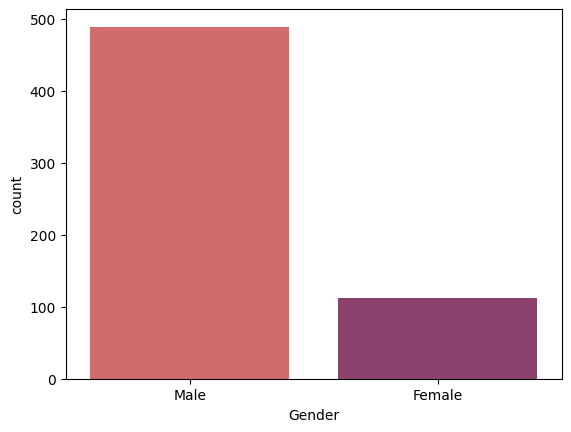

In [11]:
# "dropna" as False to count NaN (Not-a-Number) values
GenderAnalysis = loan_data.Gender.value_counts(dropna=False)
print(GenderAnalysis)

# Bar Charts Analysis "For Gender feature"
sns.countplot(x="Gender", data=loan_data, palette="flare")
plt.show()

### Categorical Column: Married

This step involves analyzing the **Married** column to understand the distribution of marital status in the dataset. The approach includes:

- **Tabular Summary**: Using `value_counts(dropna=False)` to display the frequency of married, single, and missing values.
- **Visual Representation**: A pie chart is plotted to show the proportional distribution of marital status categories using Seaborn's flare palette.

This analysis helps assess class imbalance and identify missing data before preprocessing.


Married
Yes    398
No     213
NaN      3
Name: count, dtype: int64


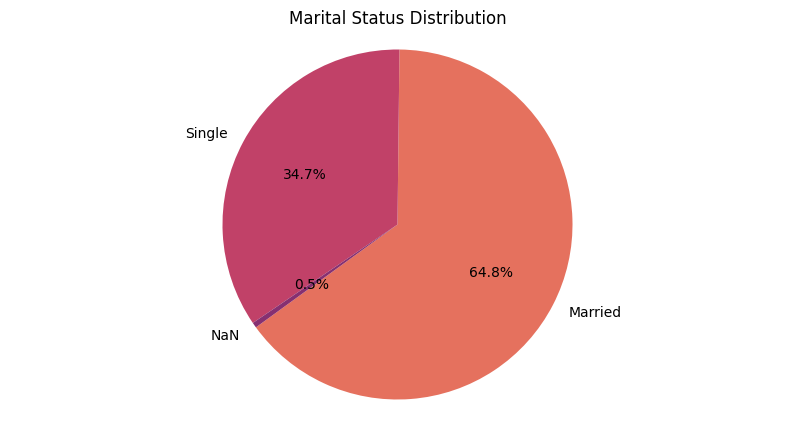

In [12]:
# "dropna" as False to count NaN values
MarriedAnalysis = loan_data.Married.value_counts(dropna=False)
print(MarriedAnalysis)

# Create a pie chart "For Married feature"
plt.figure(figsize=(10, 5)) # figure in inches

# labels by descending order
plt.pie(MarriedAnalysis, 
        labels=[("Married"),("Single"),("NaN")], 
        startangle=216, 
        autopct='%1.1f%%', 
        colors=sns.color_palette("flare", 
        len(MarriedAnalysis)))

plt.axis('equal')  # Used to set the aspect ratio of the plot to be equal.
plt.title('Marital Status Distribution')
plt.show()

### Categorical Column: Dependents

Analyzed the distribution of dependent counts using frequency tables and visualized the categories with a bar chart to identify class balance and missing values.


Dependents
0      345
1      102
2      101
3+      51
NaN     15
Name: count, dtype: int64


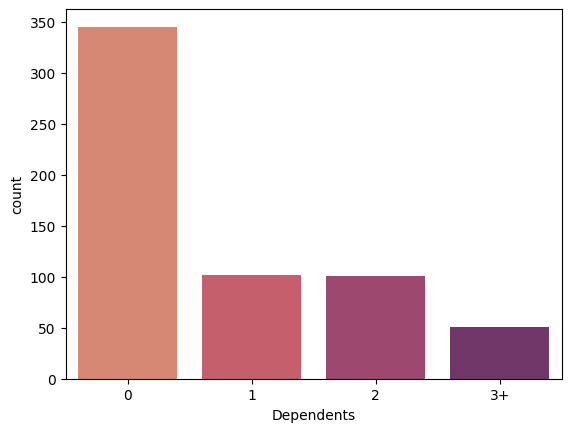

In [13]:
# "dropna" as False to count NaN values
DependentsAnalysis = loan_data.Dependents.value_counts(dropna=False)
print(DependentsAnalysis)

# Bar Charts Analysis "For Dependents feature"
sns.countplot(x="Dependents", data=loan_data, palette="flare")
plt.show()

###  Categorical Column: Education

Examined the distribution of education levels using value counts and visualized the data with a bar chart to assess class proportions and completeness.


Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64


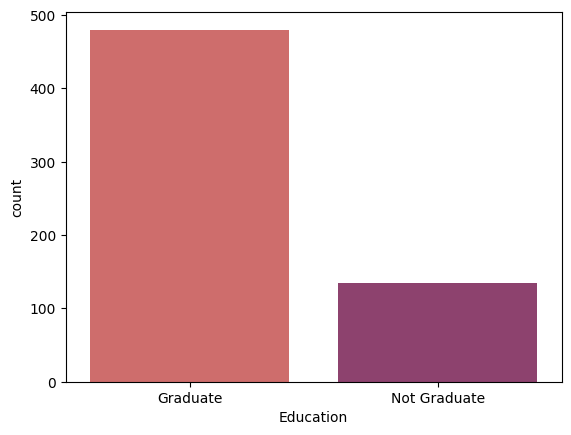

In [14]:
# "dropna" as False to count NaN values
EducationAnalysis = loan_data.Education.value_counts(dropna=False)
print(EducationAnalysis)

# Bar Charts Analysis "For Education feature"
sns.countplot(x="Education", data=loan_data, palette="flare")
plt.show()

### Categorical Column: Self_Employed

Analyzed the employment type distribution using value counts and visualized it with a bar chart to identify missing values and class balance.


Self_Employed
No     500
Yes     82
NaN     32
Name: count, dtype: int64


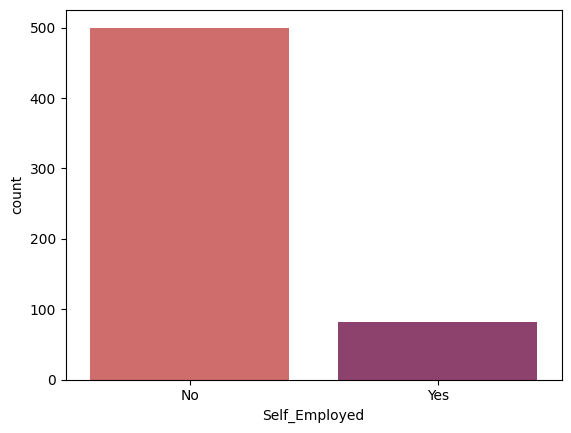

In [15]:
# "dropna" as False to count NaN values
Self_EmployedAnalysis = loan_data.Self_Employed.value_counts(dropna=False)
print(Self_EmployedAnalysis)

# Bar Charts Analysis "For Self Employed feature"
sns.countplot(x="Self_Employed", data=loan_data, palette="flare")
plt.show()

### Numerical Feature: ApplicantIncome

Computed the average applicant income and compared the distribution of above-average vs. below-average earners using a bar chart.

* Although we briefly explored the ApplicantIncome feature to observe income distribution, it is not a categorical variable—it is continuous numerical data. Our current focus is on categorical features only, such as Gender, Married, Education, etc.
* Analyzing ApplicantIncome will be more relevant during the numerical feature analysis phase, where we explore distributions, detect outliers, and prepare for normalization or transformation steps.

Hence, we will revisit ApplicantIncome later when working with numerical attributes, and exclude it from this categorical analysis section.


The Average Income: 5403.46 
The ratio of people with income above average to below average: 40.18 
Number of people income above the average: 176
Number of people income below the average: 438


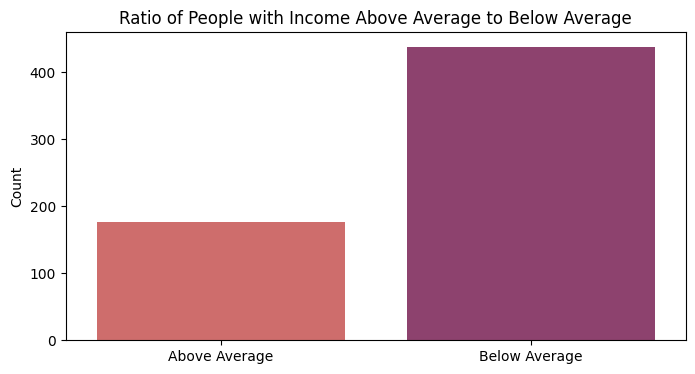

In [16]:
# Calculate the average income
average_income = loan_data['ApplicantIncome'].mean()
print(f"The Average Income: {average_income:.2f} ")

# Count incomes higher and lower than average
above_average_count = (loan_data['ApplicantIncome'] > average_income).sum()
below_average_count = (loan_data['ApplicantIncome'] <= average_income).sum()

# Calculate ratio and print the results
ratio = above_average_count / below_average_count
print(f"The ratio of people with income above average to below average: {ratio*100:.2f} ")
print(f"Number of people income above the average: {above_average_count}")
print(f"Number of people income below the average: {below_average_count}")

# Plot the ratio using Seaborn
plt.figure(figsize=(8, 4))
sns.barplot(x=['Above Average', 'Below Average'], y=[above_average_count, below_average_count], palette="flare")
plt.title('Ratio of People with Income Above Average to Below Average')
plt.ylabel('Count')
plt.show()

### Categorical Feature: Credit_History

- Counted the frequency of each value in the `Credit_History` column using `.value_counts(dropna=False)` to include missing values in the analysis.
- Plotted the distribution of credit history values using a Seaborn bar chart to visually assess the spread and presence of missing or imbalanced data.
- This helps identify the reliability of applicants’ credit history, which is a critical feature in loan approval decisions.

Credit_History
1.0    475
0.0     89
NaN     50
Name: count, dtype: int64


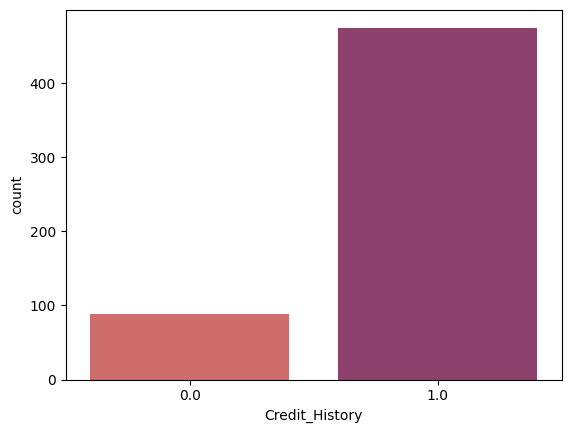

In [17]:
# "dropna" as False to count NaN values
Credit_HistoryAnalysis = loan_data.Credit_History.value_counts(dropna=False)
print(Credit_HistoryAnalysis)

# Bar Charts Analysis "For Credit History feature"
sns.countplot(x="Credit_History", data=loan_data, palette="flare")
plt.show()

### Categorical Feature: Property_Area

- Counted the occurrences of each category in the `Property_Area` column using `.value_counts(dropna=False)` to include missing data in the analysis.
- Visualized the distribution of applicants based on their property area using a Seaborn bar chart.
- This analysis helps us understand the regional distribution of applicants (Urban, Semiurban, Rural), which can influence loan risk profiles and approval trends.

Property_Area
Semiurban    233
Urban        202
Rural        179
Name: count, dtype: int64


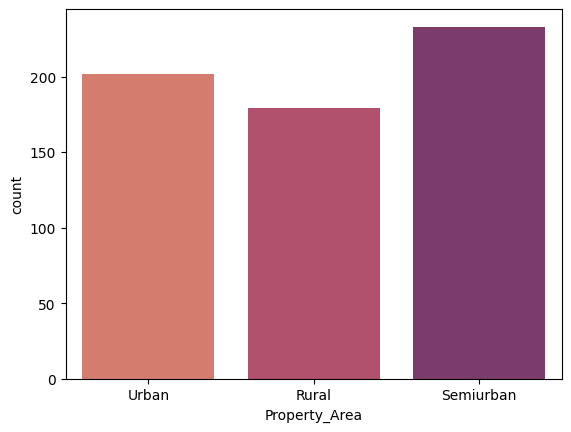

In [18]:
# "dropna" as False to count NaN values
Property_AreaAnalysis = loan_data.Property_Area.value_counts(dropna=False)
print(Property_AreaAnalysis)

# Bar Charts Analysis "For Property Area feature"
sns.countplot(x="Property_Area", data=loan_data, palette="flare")
plt.show()

### Categorical Feature: Loan_Status

- Used `.value_counts(dropna=False)` to compute the frequency of each loan approval status (Y/N), including any missing values.
- Visualized the loan approval outcomes using a bar chart to observe the proportion of approved vs. rejected applications.
- This is a key target variable in our classification problem, and its distribution gives us insight into potential class imbalance, which is important for model training.


Loan_Status
Y    422
N    192
Name: count, dtype: int64


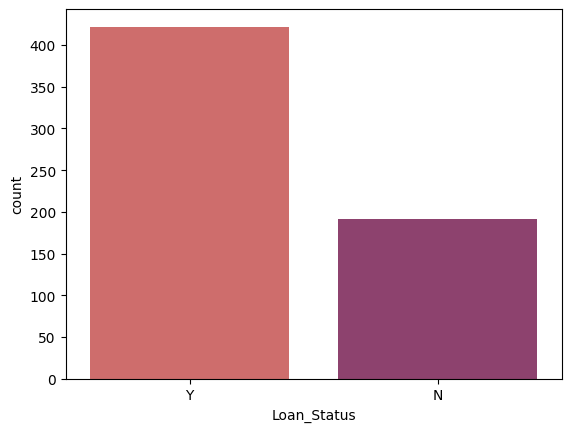

In [19]:
# "dropna" as False to count NaN values
Loan_StatusAnalysis = loan_data.Loan_Status.value_counts(dropna=False)
print(Loan_StatusAnalysis)

# Bar Charts Analysis "For Loan Status column"
sns.countplot(x="Loan_Status", data=loan_data, palette="flare")
plt.show()

The number of approved loans is higher compared to rejected loans. It also can be seen, there is no missing values in this column.

### Categorical Feature: Loan_Amount_Term

- Calculated the distribution of loan terms using `.value_counts(dropna=False)` to include all values, including missing data.
- Created a bar chart to visualize the frequency of each loan term duration (e.g., 360, 120, 180 months).
- This analysis helps in understanding the most common repayment periods and identifying any anomalies or uncommon term lengths that may need special handling.


Loan_Amount_Term
360.0    512
180.0     44
480.0     15
NaN       14
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: count, dtype: int64


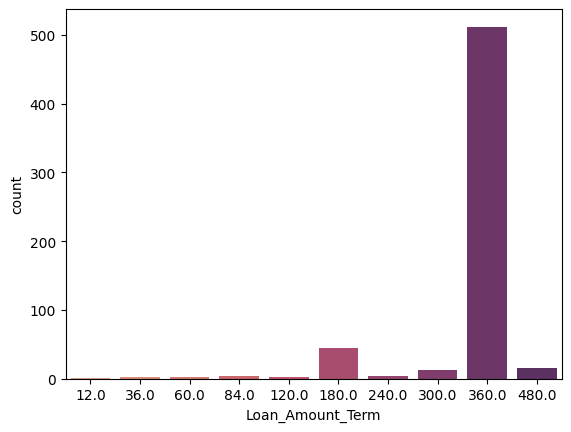

In [20]:
# "dropna" as False to count NaN values
Loan_Amount_TermAnalysis = loan_data.Loan_Amount_Term.value_counts(dropna=False)
print(Loan_Amount_TermAnalysis)

# Bar Charts Analysis "For Loan amount term feature"
sns.countplot(x="Loan_Amount_Term", data=loan_data, palette="flare")
plt.show()

As can be seen from the results, the **360** days loan duration is the most popular compared to others.

### Histogram Distribution for Numerical Features

Plotted histogram distributions with kernel density estimates (KDE) for key numerical features — `ApplicantIncome`, `CoapplicantIncome`, `LoanAmount`, and `Loan_Amount_Term`. 

This visualization helps in:
- Identifying outliers or skewed distributions.
- Understanding the overall spread and central tendency of numerical values.
- Detecting potential anomalies or patterns that may require transformation during preprocessing.

A reusable function was also created to streamline distribution plotting for multiple features.

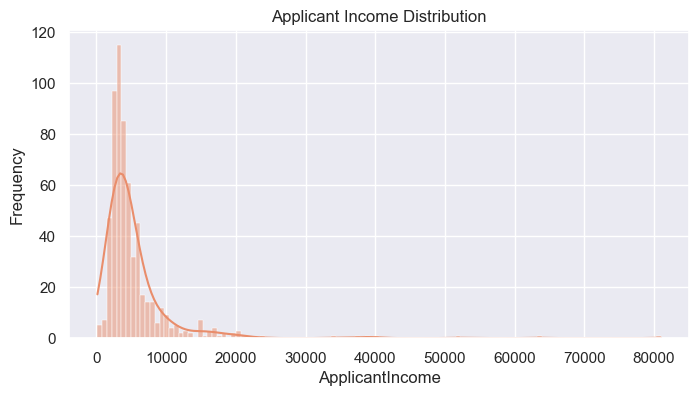

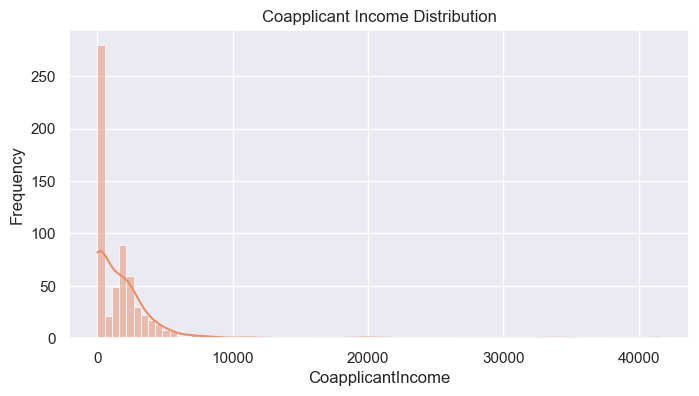

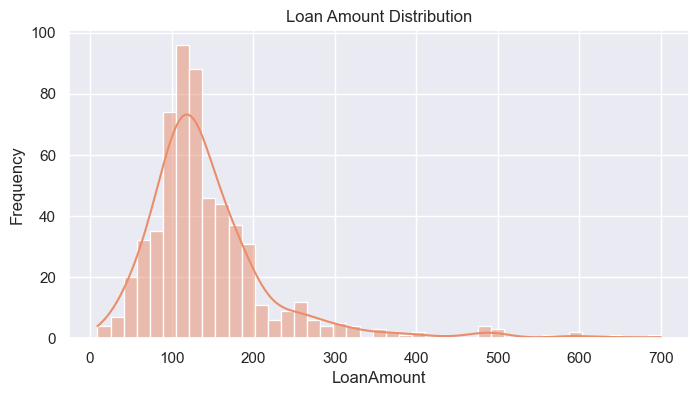

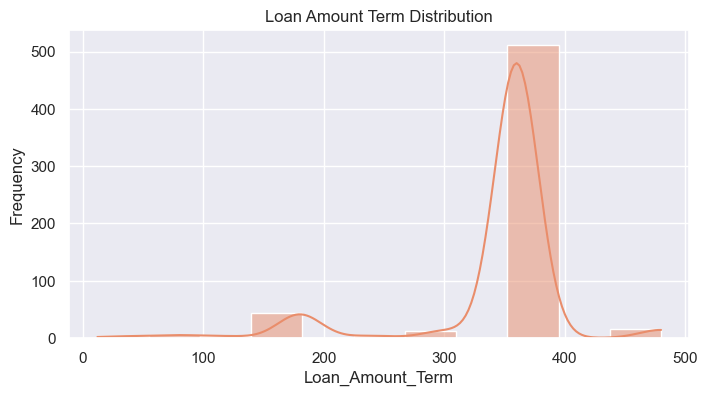

In [22]:
# Histogram distribution for numerical values "This enables us to see if there are outliers or not"

# Set the seaborn theme palette
sns.set_theme(palette="flare")

# create a function for plot distribution 

def plot_distribution(column, title):
    plt.figure(figsize=(8, 4))
    sns.histplot(data=loan_data, x=column, kde=True)
    plt.title(title)
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

# Plot distribution for each numerical column
plot_distribution("ApplicantIncome", "Applicant Income Distribution")
plot_distribution("CoapplicantIncome", "Coapplicant Income Distribution")
plot_distribution("LoanAmount", "Loan Amount Distribution")
plot_distribution("Loan_Amount_Term", "Loan Amount Term Distribution")



From this analysis we found the distribution of Applicant income, Co Applicant Income, and Loan Amount are positively skewed (which most values are clustered around the left tail of the distribution while the right tail of the distribution is longer) and it has outliers. On the other hand, The distribution of Loan Amount Term is negatively skewed and it has outliers.


### 1.b. Correlation Analysis :- Correlation Matrix Heatmap for Numerical Features

To understand the strength and direction of relationships between numerical features in the dataset, we computed a correlation matrix using `.corr(numeric_only=True)` and visualized it with a heatmap. 

This step helps to:
- Identify highly correlated features that may cause multicollinearity.
- Detect potentially redundant variables for removal or transformation.
- Highlight strong relationships that may influence the target variable.

The annotated heatmap provides a clear and interpretable view of inter-feature correlations, supporting more informed feature selection for modeling.


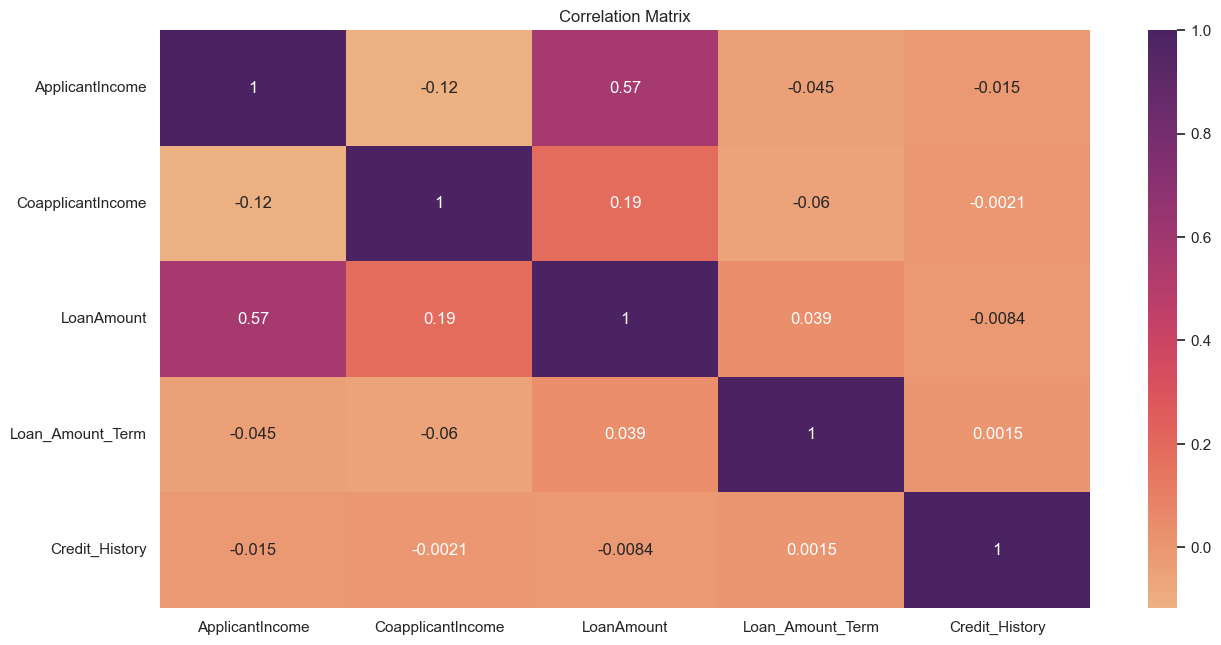

In [23]:
# Correlation matrix using heatmap
# Calculates the correlation coefficients between all pairs of numerical variables in the dataset
correlation_matrix = loan_data.corr(numeric_only=True)

# Create a heatmap figure with specified size (in inches)
plt.figure(figsize=(15, 7.5))

# Generate a heatmap to visualize the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='flare') # annot: write the data value in each cell

# Add a title to the plot
plt.title('Correlation Matrix')

# Display the heatmap
plt.show()

There is positive correlation between Loan Amount and Applicant Income.

### 1.c Data Relationships Analysis :-  Credit History vs. Loan Status (Cross-Tabulation Analysis)

We conducted a cross-tabulation analysis between `Credit_History` and `Loan_Status` to explore their relationship. A bar chart was used to visualize the count distribution across different combinations.

This analysis helps in identifying:
- How past credit behavior (represented by `Credit_History`) influences loan approval decisions (`Loan_Status`).
- Patterns indicating that applicants with a credit history of 1 are more likely to get loan approvals.

Visualizing such relationships provides crucial insights into categorical feature interactions that are valuable for predictive modeling and business decision-making.


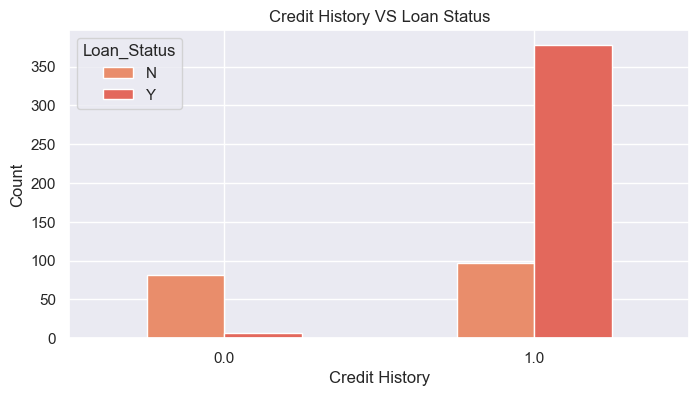

In [24]:
# Create a cross-tabulation of 'Credit History' and 'Loan status' variables
pd.crosstab(loan_data.Credit_History, loan_data.Loan_Status).plot(kind="bar", figsize=(8, 4))

# Add a title to the plot
plt.title('Credit History VS Loan Status')

# Label the x-axis
plt.xlabel('Credit History')

# Label the y-axis
plt.ylabel('Count')

# Rotate the x-axis labels to avoid overlap
plt.xticks(rotation=0)

# Display the plot
plt.show()

The analysis appears a good credit history significantly increases the chances of loan approval. Because the percentage of people who have a good credit history and are approved is much better than a bad credit history.

### Property Area vs. Loan Status (Cross-Tabulation Analysis)

We performed a cross-tabulation analysis between `Property_Area` and `Loan_Status` to investigate how the type of property location influences loan approval outcomes. A bar chart was generated to visualize the count of loan approvals and rejections across different property areas (Urban, Semiurban, Rural).

This analysis provides insight into:
- Whether applicants from certain property areas have higher chances of loan approval.
- The influence of geographic and demographic factors on loan sanctioning trends.

Understanding such interactions helps in assessing potential biases and improving the fairness of predictive models.


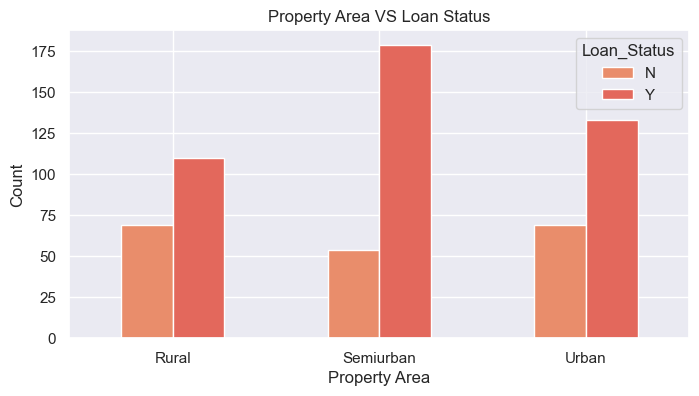

In [25]:
# Create a cross-tabulation of 'Property Area' and 'Loan Status' variables
pd.crosstab(loan_data.Property_Area, loan_data.Loan_Status).plot(kind="bar", figsize=(8, 4))

# Add a title to the plot
plt.title('Property Area VS Loan Status')

# Label the x-axis
plt.xlabel('Property Area')

# Label the y-axis
plt.ylabel('Count')

# Rotate the x-axis labels to avoid overlap
plt.xticks(rotation=0)

# Display the plot
plt.show()

Most of loan that got accepted has property in Semiurban compared to Urban and Rural.

### Gender vs. Married (Cross-Tabulation Analysis)

We conducted a cross-tabulation between `Gender` and `Married` to explore the relationship between the applicant's gender and their marital status. The resulting bar chart illustrates the distribution of married and unmarried individuals across different gender categories.

This analysis helps us understand:
- Whether marital status varies significantly by gender in the dataset.
- Patterns that could influence loan approval trends when gender and marital status are considered together.

These insights can assist in identifying demographic characteristics that may impact loan eligibility or model bias.

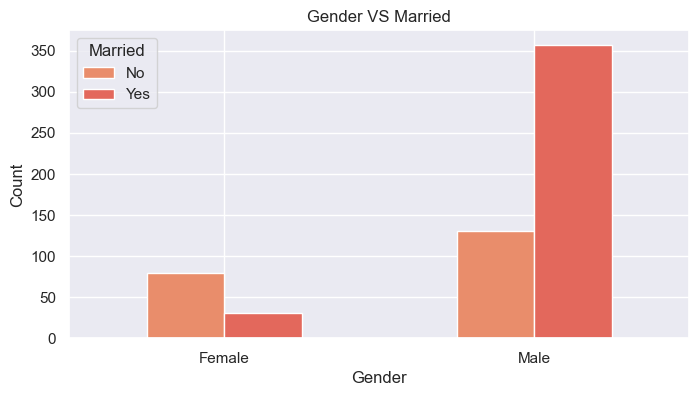

In [26]:
# Create a cross-tabulation of 'Gender' and 'Married' variables
pd.crosstab(loan_data.Gender, loan_data.Married).plot(kind="bar", figsize=(8, 4))

# Add a title to the plot
plt.title('Gender VS Married')

# Label the x-axis
plt.xlabel('Gender')

# Label the y-axis
plt.ylabel('Count')

# Rotate the x-axis labels to avoid overlap
plt.xticks(rotation=0)

# Display the plot
plt.show()

Most male applicants are already married compared to female applicants. Also, the number of not married male applicants are higher compare to female applicants that had not married.

### Education vs. Loan Status (Cross-Tabulation Analysis)

We performed a cross-tabulation between `Education` and `Loan_Status` to assess how an applicant's education level may influence their loan approval outcomes. The bar chart provides a visual representation of loan approval (`Y`) and rejection (`N`) rates for each education category (Graduate vs. Not Graduate).

This analysis is helpful in understanding:
- Whether education level correlates with higher chances of loan approval.
- Potential biases or trends in loan decisions based on academic background.

These insights are useful for feature selection and identifying possible socio-economic patterns affecting credit approval.


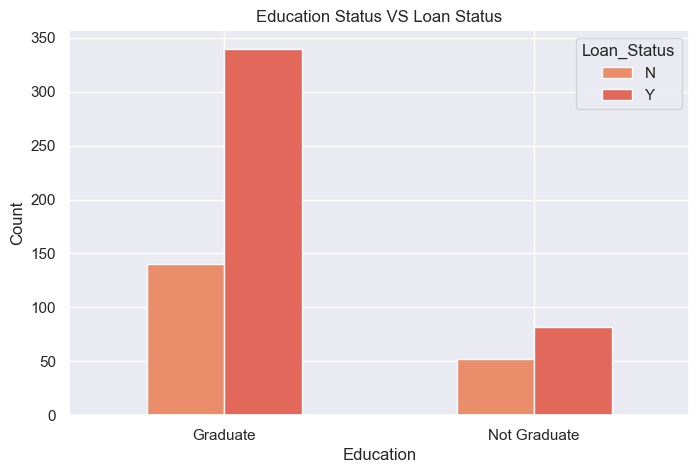

In [27]:
# Create a cross-tabulation of 'Gender' and 'Loan Status' variables
pd.crosstab(loan_data.Education, loan_data.Loan_Status).plot(kind="bar", figsize=(8, 5))

# Add a title to the plot
plt.title('Education Status VS Loan Status')

# Label the x-axis
plt.xlabel('Education')

# Label the y-axis
plt.ylabel('Count')

# Rotate the x-axis labels to avoid overlap
plt.xticks(rotation=0)

# Display the plot
plt.show()

The analysis appears a graduate applicant significantly increases the chances of loan approval. Because the percentage of people who graduated and were approved is much better than who didn't graduate.


<h3 style="color:red;">Phase 2: Data Cleaning </h3>


### 2.1. Remove Unneeded Features

#### 2.1.1 Dropping Redundant Identifier: Loan_ID

The `Loan_ID` column was dropped from the dataset as it serves only as a unique identifier and does not contribute any predictive value for modeling. Removing such non-informative columns helps reduce noise and streamline the dataset.

This step ensures our dataset contains only relevant features that can impact the model's learning process.


In [28]:
# Dropping Loan_ID column
loan_data.drop(['Loan_ID'], axis = 1 , inplace = True)

# Check the Loan_ID is dropped
print(loan_data.info())

# Check and ensure running
print(colored("The task has been completed without any errors....", "green", attrs=['reverse']))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB
None
The task has been completed without any errors....


### 2.1.2. Handling / Checking for Missing Values

Performed a scan across the dataset to identify missing (null) values using the `.isnull().sum()` function. This step is crucial for detecting incomplete records that can adversely impact data quality and model performance.

A total count of missing values was also calculated to quantify the extent of the issue, setting the stage for appropriate data imputation or cleaning strategies.


In [29]:
# Check for missing values
null_counts = loan_data.isnull().sum()

# Display the number of null values
print(null_counts)
print("_________________________________________________________________")
print(colored(f"Totally, there are {null_counts.sum()} null values in the dataset.", "green", attrs=['reverse']))

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64
_________________________________________________________________
Totally, there are 149 null values in the dataset.


### There are two types of data:
- Numerical Data
- Categorical Data

### Handling Missing Values

To ensure data completeness and maintain modeling accuracy, missing values in both numerical and categorical columns were addressed using appropriate imputation techniques:

- **Numerical Features**:
  - `Credit_History`: Filled with mode (most frequent value).
  - `LoanAmount`: Filled with mean value to preserve central tendency.
  - `Loan_Amount_Term`: Filled with mode for consistency in loan duration.

- **Categorical Features**:
  - `Gender`, `Married`, `Dependents`, `Self_Employed`: Filled with their respective mode values to retain the most common category.

This step helps in preventing model biases or errors caused by missing data.


In [30]:
# Fill the missing values for numerical data, .fillna = fill (NaN) values

loan_data["Credit_History"] = loan_data["Credit_History"].fillna(loan_data["Credit_History"].mode()[0])

loan_data["LoanAmount"] = loan_data["LoanAmount"].fillna(loan_data["LoanAmount"].mean())

loan_data["Loan_Amount_Term"] = loan_data["Loan_Amount_Term"].fillna(loan_data["Loan_Amount_Term"].mode()[0])

# Fill the missing values for categorical data.
loan_data["Gender"] = loan_data["Gender"].fillna(loan_data["Gender"].mode()[0])
loan_data["Married"] = loan_data["Married"].fillna(loan_data["Married"].mode()[0])
loan_data["Dependents"] = loan_data["Dependents"].fillna(loan_data["Dependents"].mode()[0])
loan_data["Self_Employed"] = loan_data["Self_Employed"].fillna(loan_data["Self_Employed"].mode()[0])


### Verifying Missing Value Treatment

After performing missing value imputation, we rechecked the dataset to confirm that all null entries were properly handled:

- Used `.isnull().sum()` to compute the count of missing values in each column.
- Summed all null counts to ensure that **zero missing values** remain in the dataset.

This validation ensures data quality and readiness for further preprocessing or model building.


In [31]:
# Check for missing values after handling
null_counts = loan_data.isnull().sum()

# Display the number of null values after handling
print(null_counts)
print("_________________________________________________________________")
print(colored(f"Totally, there are {null_counts.sum()} null values in the dataset.", "green", attrs=['reverse']))

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64
_________________________________________________________________
Totally, there are 0 null values in the dataset.


### 2.2 . Encoding Categorical Variables and Renaming Columns

In this step, we converted categorical variables into numerical format using **One-Hot Encoding**. This is essential because most machine learning models require numerical input.

**Key actions performed:**

- Applied `pd.get_dummies()` to transform categorical columns into binary (0/1) indicator variables.
- Removed redundant columns to avoid multicollinearity (e.g., `Gender_Female`, `Married_No`, etc.).
- Renamed remaining encoded columns for better interpretability:
  - `Gender_Male` → `Gender`
  - `Married_Yes` → `Married`
  - `Education_Graduate` → `Education`
  - `Self_Employed_Yes` → `Self_Employed`
  - `Loan_Status_Y` → `Loan_Status`

**Output:**
- Displayed the final list of column names.
- Verified the shape of the updated dataset.
- Printed the first few rows of the transformed target variable `Loan_Status`.

This transformation step ensures our dataset is fully numeric and ready for model training.


In [32]:
# Convert categorical variables into dummy/indicator variables through a process called "one-hot" encoding
loan_data = pd.get_dummies(loan_data)

# Drop unneeded features
loan_data = loan_data.drop(['Gender_Female', 
                            'Married_No', 
                            'Education_Not Graduate',
                            'Self_Employed_No', 
                            'Loan_Status_N'], axis = 1) # axis = 1 for column

# Rename existing columns
newColunmsNames = {'Gender_Male': 'Gender', 
                   'Married_Yes': 'Married', 
                   'Education_Graduate': 'Education', 
                   'Self_Employed_Yes': 'Self_Employed',
                   'Loan_Status_Y': 'Loan_Status'}

# Assigning new columns names
loan_data.rename(columns=newColunmsNames, inplace=True)

# Display the columns names and shape of the transformed dataset
## Get the column names of the DataFrame
column_names = loan_data.columns.tolist()

## Print the column names in a readable format
print(colored("Column Names:", "blue",attrs=['reverse']))

for col in column_names:
    print(f"- {col}")
    
print("The shape =",loan_data.shape)
print("_______________________________________________")

# Display the first 5 rows of the transformed target variable
print(colored("Transformed Target Variable (Y):","blue", attrs=['reverse']))
print(loan_data['Loan_Status'].head())  # First 5 rows by default

Column Names:
- ApplicantIncome
- CoapplicantIncome
- LoanAmount
- Loan_Amount_Term
- Credit_History
- Gender
- Married
- Dependents_0
- Dependents_1
- Dependents_2
- Dependents_3+
- Education
- Self_Employed
- Property_Area_Rural
- Property_Area_Semiurban
- Property_Area_Urban
- Loan_Status
The shape = (614, 17)
_______________________________________________
Transformed Target Variable (Y):
0     True
1    False
2     True
3     True
4     True
Name: Loan_Status, dtype: bool


### 2.3 . Handling Outliers :- Outlier Detection for Numerical Features

To detect outliers in the numerical columns, we use a `stripplot`. This type of plot helps us visually inspect values that deviate from the normal distribution of the data.

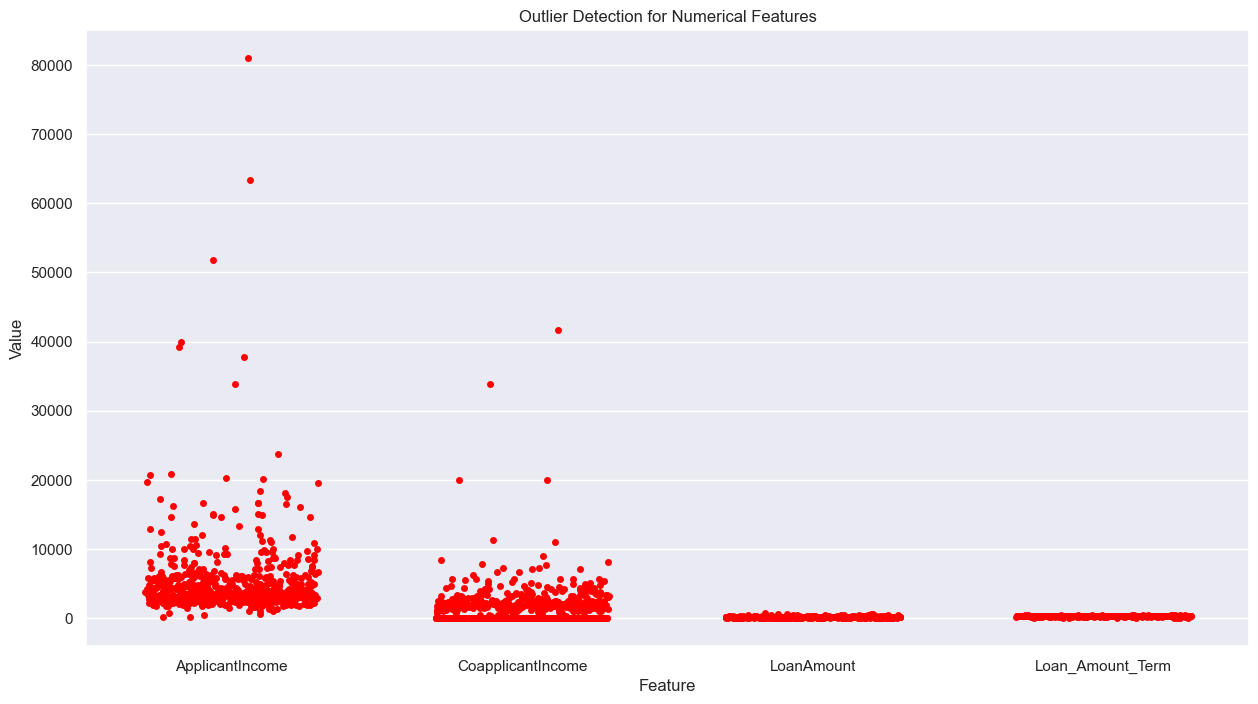

In [33]:
# Select only relevant columns
outliersColumns = loan_data[["ApplicantIncome", "CoapplicantIncome", "LoanAmount", "Loan_Amount_Term"]]

# Reshape the data for plotting
melted_data = outliersColumns.melt(var_name='Feature', value_name='Value')

# Set the figure size
plt.figure(figsize=(15, 8))

# Create the stripplot
sns.stripplot(x='Feature', y='Value', data=melted_data, color="red", jitter=0.3, size=5)

# Set the title and axis labels
plt.title("Outlier Detection for Numerical Features")
plt.xlabel("Feature")
plt.ylabel("Value")

# Show the plot
plt.show()


### 2.4 Outlier Removal Using IQR Method

Outliers are extreme values in the dataset that deviate significantly from other observations. They can arise due to data entry errors, unusual conditions, or genuine variability. However, if not addressed, outliers can:

- Skew statistical metrics such as mean and standard deviation
- Lead to misleading visualizations
- Impact the performance and accuracy of machine learning models by creating noise
- Bias training algorithms, especially those sensitive to scale (e.g., linear regression, k-NN)

To handle this, we use the Interquartile Range (IQR) method. It is a robust technique that identifies outliers without assuming a normal distribution.

The IQR is calculated as the range between the third quartile (Q3) and the first quartile (Q1). Any data point outside the range:

- Less than Q1 - 1.5 * IQR
- Greater than Q3 + 1.5 * IQR

...is considered an outlier.

We remove such rows to improve model stability, reduce noise, and ensure more reliable predictions.

After this filtering, we print the new shape of the dataset to confirm how many outlier rows were removed.


In [34]:
# Reassign new values to them

# IQR Scaling
Q1 = loan_data.astype(np.float32).quantile(0.25)
Q3 = loan_data.astype(np.float32).quantile(0.75)

# Calcuate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Removing Qutliers
loan_data = loan_data[~((loan_data < (Q1 - 1.5 * IQR)) |(loan_data > (Q3 + 1.5 * IQR))).any(axis=1)]

# printing shape
print(loan_data.shape)

# Check and ensure running
print(colored("The task has been completed without any errors....", "green", attrs=['reverse']))

(136, 17)
The task has been completed without any errors....


### 2.5 Square Root Transformation for Normalization

Some numerical features in the dataset, such as `ApplicantIncome`, `CoapplicantIncome`, and `LoanAmount`, may have **right-skewed distributions**. This skewness can negatively affect statistical analysis and machine learning model performance, especially for models that assume normally distributed input (e.g., linear regression, logistic regression).

To address this, we apply a **Square Root Transformation**. This transformation:

- Reduces the effect of extreme values
- Helps to normalize the data distribution
- Makes the data more symmetrical
- Stabilizes the variance

In this step, we apply the square root to each of the skewed numerical columns individually. After the transformation, we print the shape of the dataset and prepare to re-visualize the distributions to verify the improvement.

In [35]:
# Square Root Transformation - to normalized the distribution.
loan_data.ApplicantIncome = np.sqrt(loan_data.ApplicantIncome)
loan_data.CoapplicantIncome = np.sqrt(loan_data.CoapplicantIncome)
loan_data.LoanAmount = np.sqrt(loan_data.LoanAmount)

print(loan_data.shape)
print(colored("We will see the distribution after Scaling","green", attrs=["reverse"]))

(136, 17)
We will see the distribution after Scaling



### 2.6 Visualizing Outliers Using Strip Plot : Visualize data distribution after handling outliers

After performing transformations and cleaning, it's essential to visualize the data for potential outliers in key numerical variables. In this step, we focus on the following features:

- `ApplicantIncome`
- `CoapplicantIncome`
- `LoanAmount`
- `Loan_Amount_Term`

We use a **strip plot** to display individual data points along a categorical axis, making it easier to spot outliers that deviate from the majority of data.

#### Why This Step Is Important:
- Helps to **identify extreme values** that may not have been removed during earlier processing.
- Ensures **data integrity** before feeding it into machine learning models.
- Guides further decisions about **transformation** or **additional outlier handling**.
- Visual validation of the data distribution across selected features.

This plot provides a quick, intuitive way to assess the presence and extent of outliers in the dataset.


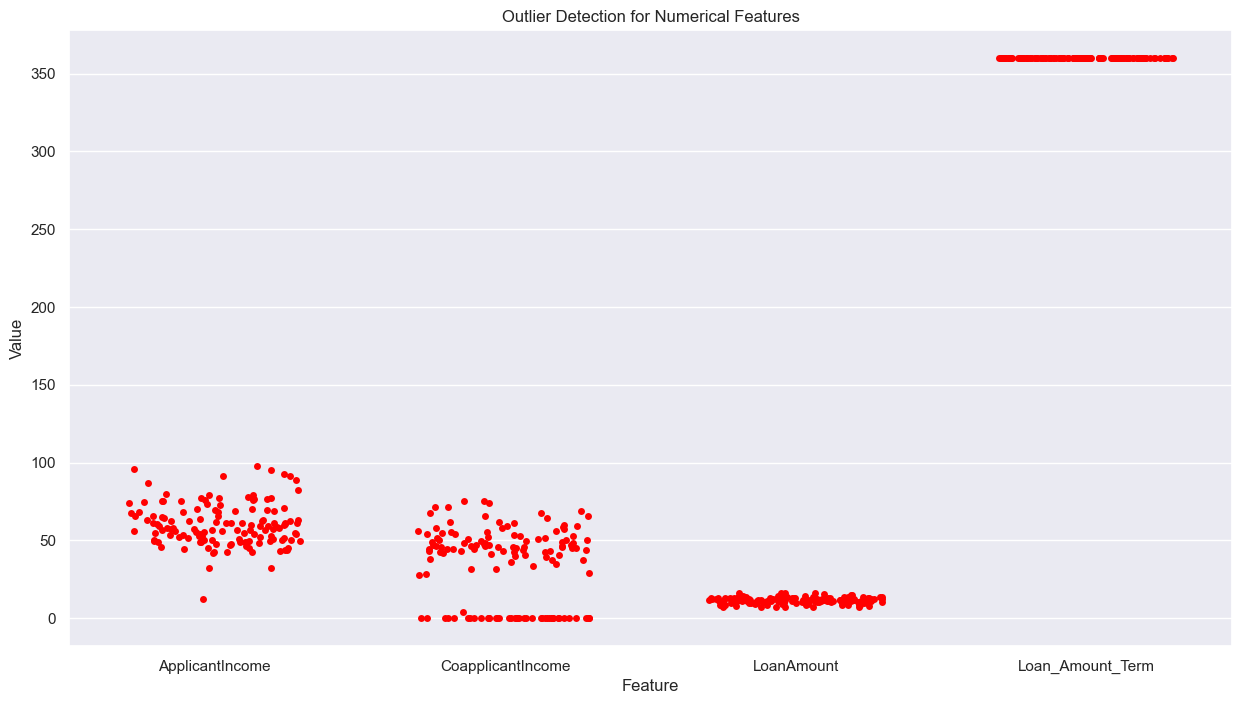

In [36]:
# Select only relevant columns
outliersColumns = loan_data[["ApplicantIncome", "CoapplicantIncome", "LoanAmount", "Loan_Amount_Term"]]

# Reshape the data for plotting (long-form)
melted_data = outliersColumns.melt(var_name='Feature', value_name='Value')

# Set the figure size
plt.figure(figsize=(15, 8))

# Create the stripplot
sns.stripplot(x='Feature', y='Value', data=melted_data, color="red", jitter=0.3, size=5)

# Set the title and axis labels
plt.title("Outlier Detection for Numerical Features")
plt.xlabel("Feature")
plt.ylabel("Value")

# Show the plot
plt.show()

### 2.7 Histogram Distribution for Numerical Features

To understand the distribution of numerical data and detect possible outliers or skewness, histograms are plotted for key financial variables such as `ApplicantIncome`, `CoapplicantIncome`, and `LoanAmount`. A Kernel Density Estimate (KDE) curve is overlaid on each histogram to provide a smoother view of the probability distribution.

##### Why this is important:
- Helps identify **skewness** in income or loan amount data.
- Reveals the presence of **outliers** or extreme values.
- Provides insights into the **spread and central tendency** of the variables.
- Assists in deciding whether **scaling or transformation** (like log/square root) is required.
- Prepares the data for machine learning models that assume normally distributed inputs.

This visualization step supports better data preprocessing and can significantly impact model accuracy and interpretability.


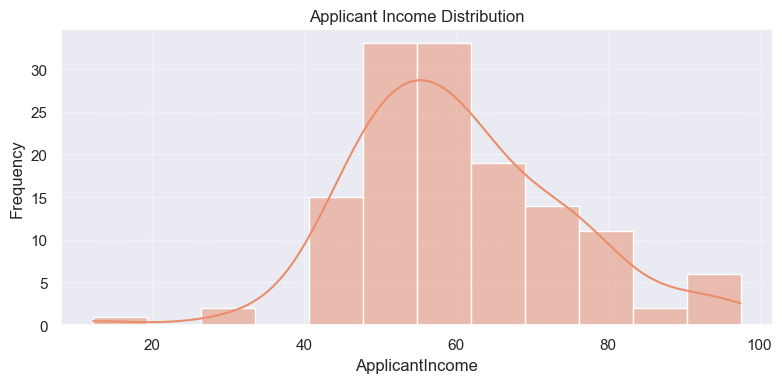

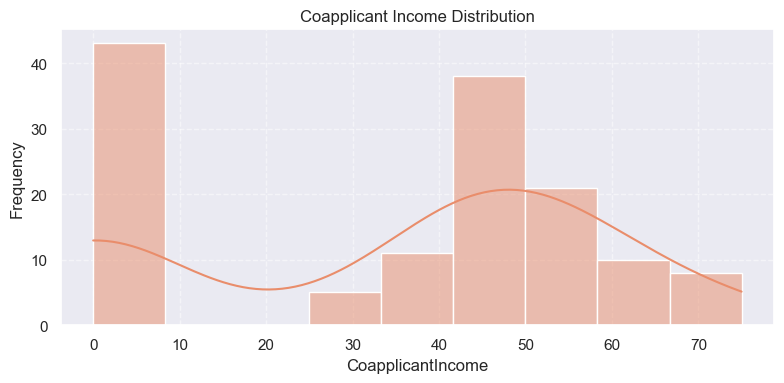

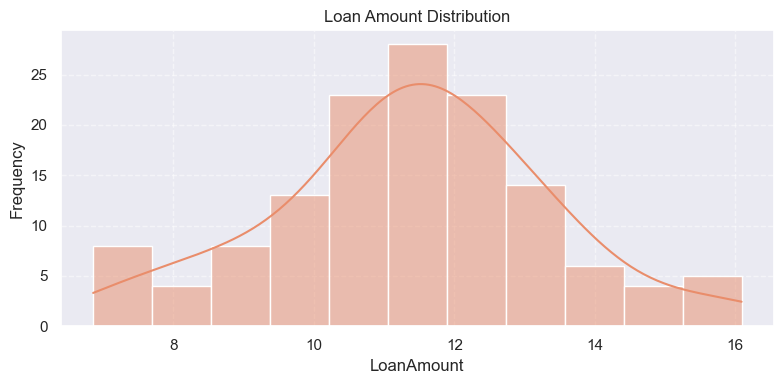

In [37]:
# Histogram distribution for numerical values

# Set the seaborn theme palette
sns.set_theme(palette="flare")

def plot_distribution(column, title):
    if not np.issubdtype(loan_data[column].dtype, np.number):
        print(f"Column '{column}' is not numeric and will be skipped.")
        return
    
    plt.figure(figsize=(8, 4))
    sns.histplot(data=loan_data, x=column, kde=True, kde_kws={'bw_adjust': 1.2})
    plt.title(title)
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

# Plot distribution for each numerical column
plot_distribution("ApplicantIncome", "Applicant Income Distribution")
plot_distribution("CoapplicantIncome", "Coapplicant Income Distribution")
plot_distribution("LoanAmount", "Loan Amount Distribution")


As can be seen, the distribution after using log transformation are much better compared to original distribution.

###  2.8. Handling Duplicates :- Duplicate Check for Numerical Columns
To maintain data quality and avoid skewed statistical results, we performed a duplicate check on key numerical columns within the dataset. 
* The output from this validation confirmed whether each column had duplicate entries and provided the count if applicable. This ensures the dataset is well-prepared for further statistical analysis or machine learning tasks.

In [38]:
# List of column names to check for duplicates (Numerical values)
columns_to_check = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']

# Iterate over each column name
for column_name in columns_to_check:
    # Checking for duplicate entries in the current column
    duplicate_count = loan_data[column_name].duplicated().sum()
    
    # Output the result with a descriptive message
    if duplicate_count == 0:
        print(colored(f"No duplicate entries found in the {column_name} column.", "green", attrs=['reverse']))
    else:
        print(colored(f"Number of duplicate entries found in the {column_name} column: {duplicate_count}", "cyan", attrs=['bold']))

Number of duplicate entries found in the ApplicantIncome column: 10
Number of duplicate entries found in the CoapplicantIncome column: 45
Number of duplicate entries found in the LoanAmount column: 57
Number of duplicate entries found in the Loan_Amount_Term column: 135
Number of duplicate entries found in the Credit_History column: 135


We don't need to handle duplicate values because it isn't affecting the accuracy or integrity of the analysis or model being performed.


<h3 style="color:red;">Phase 3: Data Pre - Processing </h3>



### 3.1. Feature & Target Variable Separation :- Splitting data into "Features" - "Target
* Features (X): All independent variables used as model inputs.
* Target (Y): The dependent variable Loan_Status to be predicted.

In [39]:
# Features "Inputs" (X)
X = loan_data.drop(columns=['Loan_Status'])

# Target variable "Outputs" (Y)
Y = loan_data['Loan_Status']

# Print the shapes of X and Y to verify the splitting
print("Shape of X:", X.shape)
print("Shape of Y:", Y.shape)

Shape of X: (136, 16)
Shape of Y: (136,)


## <font size="4" face="WildWest">2. SMOTE Technique</font>
In previous exploration, it can be seen that the number between **accepted** and **rejected** loan is *imbalanced*. In this section, oversampling technique will be used to avoid overfitting. But recently I discovered that not using it will give higher accuracy. 

### Feature Scaling (Min-Max Normalization)
* To ensure all features contribute equally and avoid dominance due to different scales, Min-Max Scaling is applied. This technique rescales each feature to a fixed range, usually 0,1 preserving the shape of the distribution but standardizing the scale.

In [40]:
# Rescale and normalize the features
# Min-Max Scaling (Rescaling)
min_max_scaler = MinMaxScaler()
X = min_max_scaler.fit_transform(X)

**Why we use fit_transform() on training data but transform() on the test data?**
    
The fit_transform() method is used on training data to calculate scaling parameters like **mean** and **standard deviation**, then applies scaling. For test data, we apply the same scaling transformation without recalculating parameters, ensuring consistency for fair comparison and accurate evaluation.

### Splitting data into "Training" - "Testing
* To evaluate the model's performance on unseen data, the dataset is split into training (80%) and testing (20%) subsets. The random_state ensures reproducibility. This allows for reliable validation of the model's generalization capability.

In [41]:
# Split the data into training and testing sets
# X: Features, Y: Target variable
# test_size=0.2 specifies that 20% of the data will be used for testing and 80% for training
# random_state=0 sets the random seed for reproducibility
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

# Print the shapes of the training and testing sets to verify the splitting
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of Y_train:", Y_train.shape)
print("Shape of Y_test:", Y_test.shape)

Shape of X_train: (108, 16)
Shape of X_test: (28, 16)
Shape of Y_train: (108,)
Shape of Y_test: (28,)


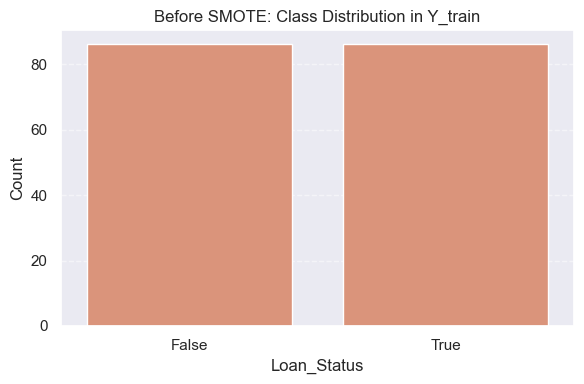

Checking class distribution in Y_train:
Loan_Status
True     86
False    86
Name: count, dtype: int64


No major imbalance found (ratio >= 0.8).
Reason to SKIP SMOTE:
Class distribution is reasonably balanced.
Applying SMOTE may add unnecessary synthetic noise.

Final Training/Test Dataset Shapes:
X_train: (172, 16)
Y_train: (172,)
X_test : (28, 16)
Y_test : (28,)


In [43]:
from collections import Counter
from imblearn.over_sampling import SMOTE
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# ------------------------------------------------------------
# Visualize the original class distribution in the training set
# ------------------------------------------------------------
plt.figure(figsize=(6, 4))
sns.countplot(x=Y_train)
plt.title("Before SMOTE: Class Distribution in Y_train")
plt.xlabel("Loan_Status")
plt.ylabel("Count")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# ------------------------------------------------------------
# Step 1: Check the class distribution
# ------------------------------------------------------------
print("Checking class distribution in Y_train:")
class_distribution = pd.Series(Y_train).value_counts()
print(class_distribution)
print("\n")

# ------------------------------------------------------------
# Step 2: Analyze for imbalance
# ------------------------------------------------------------
majority_class = class_distribution.max()
minority_class = class_distribution.min()
imbalance_ratio = minority_class / majority_class

# ------------------------------------------------------------
# Step 3: Apply SMOTE if imbalance exists
# ------------------------------------------------------------
if imbalance_ratio < 0.8:
    print("Detected class imbalance (ratio < 0.8)")
    print("Reason to USE SMOTE:")
    print("Model may overfit to the majority class.")
    print("SMOTE generates synthetic samples for the minority class to balance the training data.\n")
    
    # Apply SMOTE only on training data
    smote = SMOTE(random_state=0)
    X_train_balanced, Y_train_balanced = smote.fit_resample(X_train, Y_train)
    
    # Replace the original training set with balanced data
    X_train, Y_train = X_train_balanced, Y_train_balanced

    # --------------------------------------------------------
    # Step 4: Show new class distribution after SMOTE
    # --------------------------------------------------------
    print("After SMOTE (Balanced Class Counts):")
    print(pd.Series(Y_train).value_counts())

    # --------------------------------------------------------
    # Step 5: Visualize the class distribution post-SMOTE
    # --------------------------------------------------------
    plt.figure(figsize=(6, 4))
    sns.countplot(x=Y_train)
    plt.title("After SMOTE: Balanced Class Distribution")
    plt.xlabel("Loan_Status")
    plt.ylabel("Count")
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

else:
    print("No major imbalance found (ratio >= 0.8).")
    print("Reason to SKIP SMOTE:")
    print("Class distribution is reasonably balanced.")
    print("Applying SMOTE may add unnecessary synthetic noise.")

# ------------------------------------------------------------
# Final sanity check on dataset dimensions before model training
# ------------------------------------------------------------
print("\nFinal Training/Test Dataset Shapes:")
print("X_train:", X_train.shape)
print("Y_train:", Y_train.shape)
print("X_test :", X_test.shape)
print("Y_test :", Y_test.shape)



<h3 style="color:red;">Phase 4 :- Model Selection </h3>


## 📊 Model Selection Strategy

This section outlines the selection and exploration of various machine learning classification algorithms to develop a robust model for **loan approval prediction** in early-stage retail businesses. Our goal is to assess multiple algorithms across different families to identify the most suitable ones based on performance, interpretability, and scalability.

---

### ✅ Baseline Models for Initial Training and Evaluation

| No. | Algorithm                       | Purpose & Characteristics                                                                 |
|-----|---------------------------------|--------------------------------------------------------------------------------------------|
| 1   | Decision Tree Classifier        | Simple, interpretable tree-based model; prone to overfitting on small data.                |
| 2   | Random Forest Classifier        | Ensemble of decision trees; reduces variance and typically improves generalization.        |
| 3   | Naive Bayes (Gaussian/Bernoulli)| Probabilistic model assuming feature independence; efficient and fast for small datasets.  |
| 4   | Logistic Regression             | Linear classifier; useful for baseline and interpretable decision boundaries.              |
| 5   | Ridge Classifier CV             | Regularized linear model with built-in cross-validation to reduce overfitting.             |
| 6   | K-Nearest Neighbors (KNN)       | Instance-based learner; performance sensitive to feature scaling and data distribution.    |

---

### 🔍 Extended Models for Future Comparison and Tuning

| No. | Algorithm                       | Purpose & Characteristics                                                                 |
|-----|---------------------------------|--------------------------------------------------------------------------------------------|
| 7   | Support Vector Classifier (SVC) | Suitable for high-dimensional spaces; requires careful kernel and regularization tuning.   |
| 8   | Gradient Boosting Classifier    | Boosting technique building trees sequentially; robust but computationally intensive.      |
| 9   | XGBoost                         | Optimized gradient boosting; supports regularization, missing values, and parallelism.     |
| 10  | LightGBM                        | Leaf-wise tree growth; faster than XGBoost, especially with large datasets.                |
| 11  | CatBoost                        | Gradient boosting with native categorical feature handling; minimal preprocessing needed.  |
| 12  | Linear Discriminant Analysis    | Assumes equal class covariances; useful for feature reduction and interpretable modeling.  |
| 13  | Quadratic Discriminant Analysis | Similar to LDA but handles class-specific covariances; better for non-linear separation.   |

---

### 🎯 Objective

- To **train and compare** multiple models across accuracy, F1-score, and generalization ability.
- To understand trade-offs between **model complexity** and **interpretability**.
- To select top models for further analysis using **Explainable AI (XAI)** techniques like **SHAP**, **LIME**, and **ELI5**.

---

> **Note:** All models will be evaluated using consistent training-validation splits and hyperparameter tuning strategies to ensure fair comparison.


## <font size="6" face="WildWest">1. Importing models for selection process</font>

In [44]:
# ===================== MODEL IMPORTS WITH EXPLANATIONS ===================== #

# 📌 Model 1: Decision Tree Classifier - Simple and interpretable decision rules
from sklearn.tree import DecisionTreeClassifier

# 📌 Model 2: Random Forest - Ensemble of decision trees; improves accuracy and reduces overfitting
from sklearn.ensemble import RandomForestClassifier

# 📌 Model 3: Naive Bayes - Probabilistic classifiers assuming feature independence
# GaussianNB: for continuous features (assumes normal distribution)
# BernoulliNB: for binary/boolean features
from sklearn.naive_bayes import GaussianNB, BernoulliNB

# 📌 Model 4: Ridge Classifier CV - Linear classifier with L2 regularization & built-in cross-validation
from sklearn.linear_model import RidgeClassifierCV

# 📌 Model 5: Logistic Regression - Linear classifier used for binary classification and interpretability
from sklearn.linear_model import LogisticRegression

# 📌 Model 6: K-Nearest Neighbors - Instance-based classifier; no training time, sensitive to scale
from sklearn.neighbors import KNeighborsClassifier

# 📌 Model 7: Support Vector Classifier - Effective in high-dimensional spaces, works well with margin optimization
from sklearn.svm import SVC

# 📌 Model 8: Gradient Boosting - Sequential ensemble of trees, reduces bias, good performance on tabular data
from sklearn.ensemble import GradientBoostingClassifier

# 📌 Model 9: XGBoost - Optimized boosting with regularization, parallelism support
from xgboost import XGBClassifier

# 📌 Model 10: LightGBM - Gradient boosting with leaf-wise growth, fast & efficient
from lightgbm import LGBMClassifier

# 📌 Model 11: CatBoost - Handles categorical data natively, minimal preprocessing needed
from catboost import CatBoostClassifier

# 📌 Model 12: LDA - Linear Discriminant Analysis; assumes shared class covariances
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# 📌 Model 13: QDA - Quadratic Discriminant Analysis; allows distinct class covariances
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

# ===================== ✅ SUCCESS MESSAGE ===================== #
try:
    from termcolor import colored
    print(colored("✅ ALL 13 MODEL LIBRARIES WERE SUCCESSFULLY IMPORTED...", "green", attrs=['reverse']))
except ImportError:
    print("✅ ALL 13 MODEL LIBRARIES WERE SUCCESSFULLY IMPORTED...")
    print("🔔 To enable colored console output, run: pip install termcolor")


✅ ALL 13 MODEL LIBRARIES WERE SUCCESSFULLY IMPORTED...


## <font size="6" face="WildWest">2. Training the Machine Learning Algorithms</font>

### save the accuracy for the model

In [57]:
import pandas as pd
import os

def save_model_accuracy(model_name, train_acc, test_acc, csv_path="model_results.csv"):
    """
    Saves model name, training accuracy, and testing accuracy to a CSV file.
    Replaces the row if model already exists.
    """

    # New row to be added or replaced
    new_row = {
        "Model_Name": model_name,
        "Train_Accuracy": round(train_acc, 4),
        "Test_Accuracy": round(test_acc, 4)
    }

    # If file exists, read and update it
    if os.path.exists(csv_path):
        df = pd.read_csv(csv_path)

        # Remove existing entry with same model name
        df = df[df["Model_Name"] != model_name]

        # Append new row
        df = pd.concat([df, pd.DataFrame([new_row])], ignore_index=True)
    else:
        # If file does not exist, create a new one
        df = pd.DataFrame([new_row])

    # Save to CSV
    df.to_csv(csv_path, index=False)

    print(f"✅ Model '{model_name}' results saved (replaced if existed) to {csv_path}")


## Model 1:

### Decision Tree Classifier: Hyperparameter Tuning and Analysis

This section presents a manual grid search-like experiment to evaluate the performance of a `DecisionTreeClassifier` by tuning key hyperparameters. The goal is to identify the optimal combination of parameters that leads to high accuracy and generalization.

### Parameters Considered

- **`max_depth`**: Maximum depth of the decision tree. It defines how deep the tree can grow. Deeper trees can capture complex patterns but may overfit the training data.
- **`min_samples_leaf`**: Minimum number of samples required to be at a leaf node. Increasing this value can regularize the tree and reduce overfitting.
- **`max_features`**: Number of features considered when looking for the best split. This is fixed to `2` across all iterations for simplicity and consistency.

### Experiment Setup

- **Search Range**:
  - `max_depth`: Values from 1 to 19
  - `min_samples_leaf`: Values from 1 to 4

- **Total Configurations Tested**: 76 (19 × 4 combinations)

For each combination, the following steps were executed:

1. Initialize a `DecisionTreeClassifier` with the selected parameters.
2. Train the model using the training dataset (`X_train`, `Y_train`).
3. Evaluate and store accuracy scores for both the training and testing datasets.

### Evaluation Strategy

The following metrics were computed and compared across configurations:

- **Training Accuracy**: Assesses how well the model fits the training data. Low training accuracy may indicate underfitting.
- **Testing Accuracy**: Indicates the model’s performance on unseen data. A significant drop compared to training accuracy suggests overfitting.

By analyzing both metrics, we aim to identify a parameter set that provides a good balance between bias and variance.

### Results Summary

The highest accuracy values for training and testing sets were extracted using:

```python
DT_Accuracy_Train = max(scoreListDT_Train)
DT_Accuracy_Test = max(scoreListDT_Test)



🔍 Performing GridSearchCV to find best pre-pruning parameters...

Fitting 5 folds for each of 4374 candidates, totalling 21870 fits

✅ Best Parameters Found (Pre-Pruning):
   criterion: entropy
   max_depth: 10
   max_features: None
   min_samples_leaf: 1
   min_samples_split: 10
   min_weight_fraction_leaf: 0.0
   splitter: random

📊 Classification Report:
              precision    recall  f1-score   support

       False       0.00      0.00      0.00         2
        True       0.91      0.77      0.83        26

    accuracy                           0.71        28
   macro avg       0.45      0.38      0.42        28
weighted avg       0.84      0.71      0.77        28

✅ Train Accuracy: 88.95%
✅ Test Accuracy: 71.43%


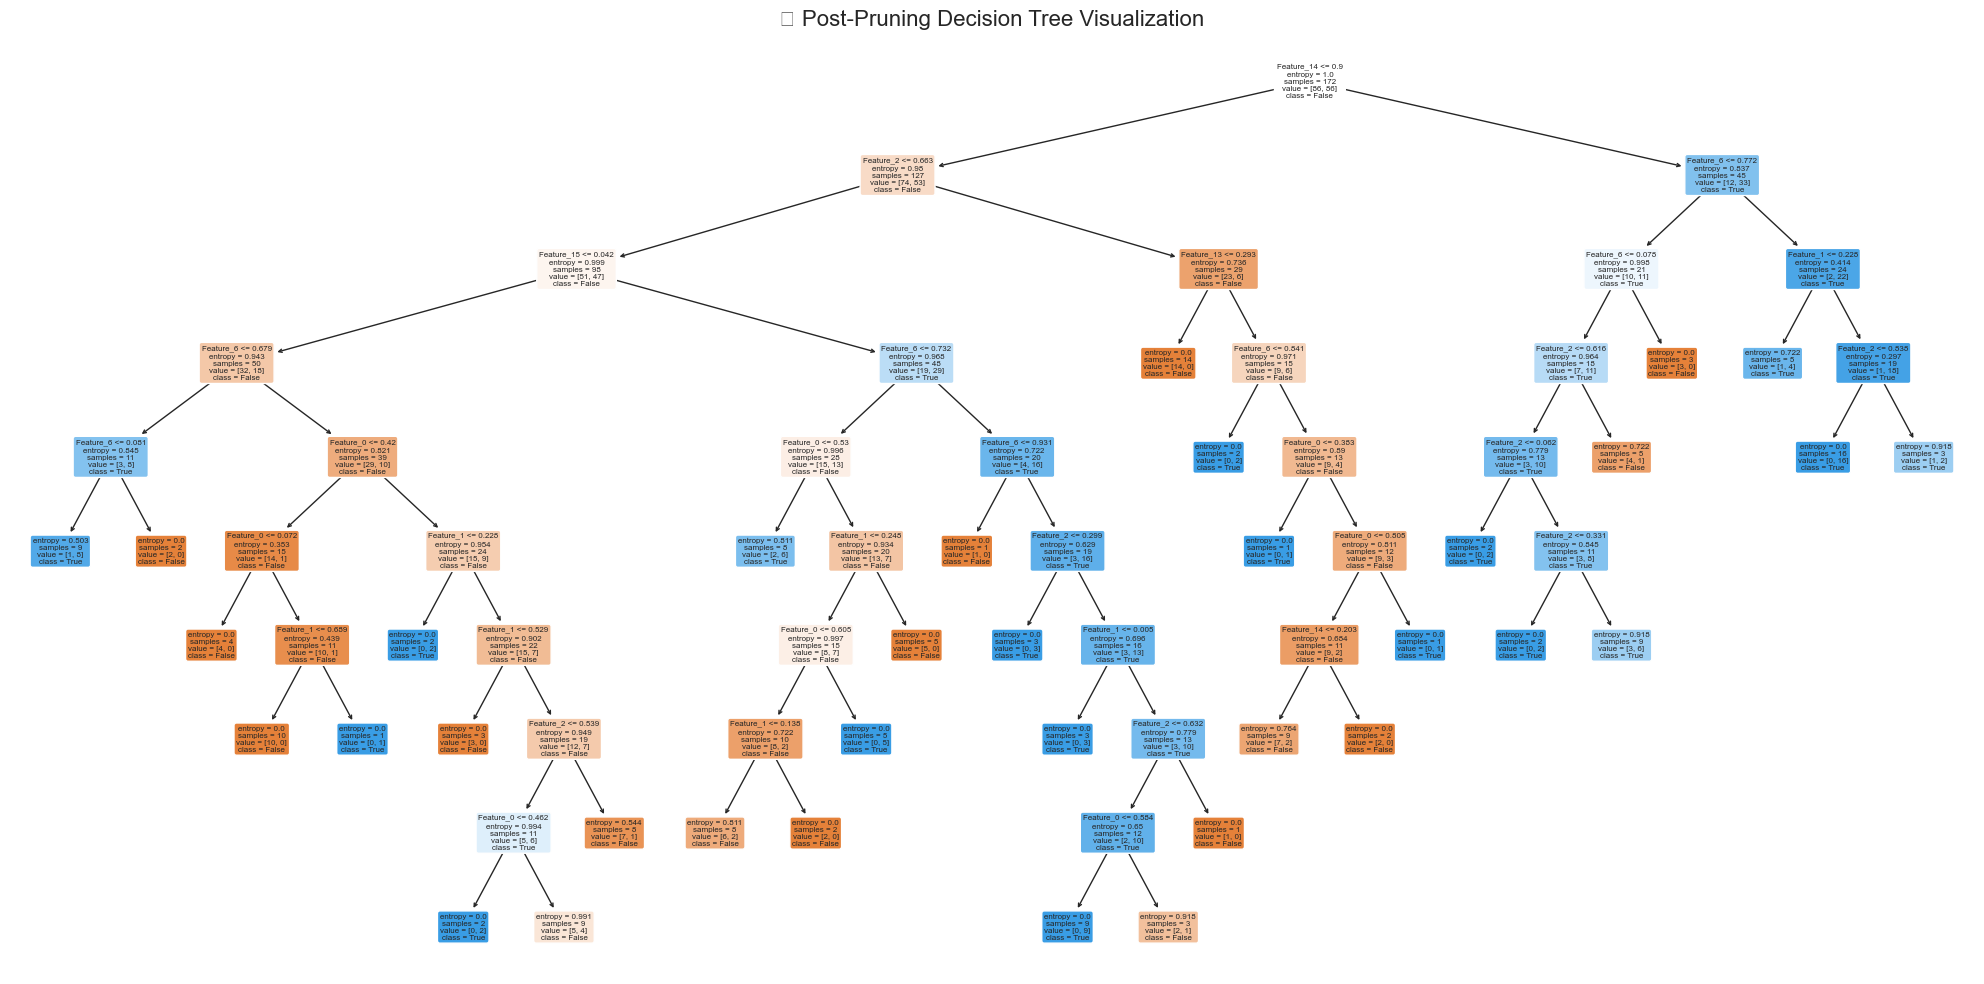


✅ Decision Tree Model trained and visualized successfully with pre-pruning.


In [48]:
# ===================== IMPORT REQUIRED LIBRARIES ===================== #
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
from termcolor import colored
import os
from datetime import datetime

# ===================== 📘 DEFINE PARAMETER GRID FOR PRE-PRUNING ===================== #
dt_param_grid = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'splitter': ['best', 'random'],
    'max_depth': list(range(2, 11)),
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2'],
    'min_weight_fraction_leaf': [0.0, 0.1, 0.2]
}

# ===================== 🔄 DATA PREPARATION SAFETY CHECK ===================== #
if isinstance(X_train, np.ndarray):
    X_train = pd.DataFrame(X_train)
if X_train.columns is None or isinstance(X_train.columns, pd.RangeIndex):
    X_train.columns = [f'Feature_{i}' for i in range(X_train.shape[1])]

# ===================== 🔍 GRID SEARCH FOR BEST PARAMETERS ===================== #
print(colored("\n🔍 Performing GridSearchCV to find best pre-pruning parameters...\n", "cyan"))
dt_base = DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(estimator=dt_base, 
                           param_grid=dt_param_grid, 
                           cv=5, 
                           scoring='accuracy', 
                           n_jobs=-1, 
                           verbose=1)
grid_search.fit(X_train, Y_train)
best_params = grid_search.best_params_

print(colored("\n✅ Best Parameters Found (Pre-Pruning):", "green", attrs=["bold"]))
for param, value in best_params.items():
    print(f"   {param}: {value}")

# ===================== 🧠 TRAIN FINAL MODEL ===================== #
best_dt_model = DecisionTreeClassifier(**best_params, random_state=42)
best_dt_model.fit(X_train, Y_train)

# ===================== 📈 ACCURACY TRACKING ===================== #
train_preds = best_dt_model.predict(X_train)
DT_Accuracy_Train = accuracy_score(Y_train, train_preds)
y_pred = best_dt_model.predict(X_test)
DT_Accuracy_Test = accuracy_score(Y_test, y_pred)


# ===================== 📊 MODEL EVALUATION ===================== #
print(colored("\n📊 Classification Report:", "blue"))
print(classification_report(Y_test, y_pred))
print(colored(f"✅ Train Accuracy: {DT_Accuracy_Train * 100:.2f}%", "blue", attrs=["bold"]))
print(colored(f"✅ Test Accuracy: {DT_Accuracy_Test * 100:.2f}%", "blue", attrs=["bold"]))

# ===================== 🌳 VISUALIZE THE FINAL PRUNED DECISION TREE ===================== #
plt.figure(figsize=(20, 10))
plot_tree(best_dt_model,
          filled=True,
          feature_names=X_train.columns,
          class_names=best_dt_model.classes_.astype(str),
          rounded=True)
plt.title("🌳 Post-Pruning Decision Tree Visualization", fontsize=16)
plt.tight_layout()
plt.show()

# ===================== ✅ FINAL SUCCESS MESSAGE ===================== #
print(colored("\n✅ Decision Tree Model trained and visualized successfully with pre-pruning.", "green", attrs=['reverse']))


In [49]:
# ✅ Save Decision Tree results using reusable save_model_accuracy function
save_model_accuracy(
    model_name="Decision Tree Classifier",
    train_acc=DT_Accuracy_Train,
    test_acc=DT_Accuracy_Test
)


✅ Model 'Decision Tree Classifier' results saved to model_results.csv


### Model 2 
#### Random Forest


🔍 Performing GridSearchCV to tune Random Forest parameters...

Fitting 5 folds for each of 1458 candidates, totalling 7290 fits

✅ Best Parameters Found for Random Forest (Pre-Pruning):
   bootstrap: False
   criterion: gini
   max_depth: 10
   max_features: sqrt
   min_samples_leaf: 1
   min_samples_split: 2
   n_estimators: 150

📊 Classification Report for Random Forest:
              precision    recall  f1-score   support

       False       0.00      0.00      0.00         2
        True       0.92      0.92      0.92        26

    accuracy                           0.86        28
   macro avg       0.46      0.46      0.46        28
weighted avg       0.86      0.86      0.86        28

✅ Train Accuracy: 100.00%
✅ Test Accuracy: 85.71%


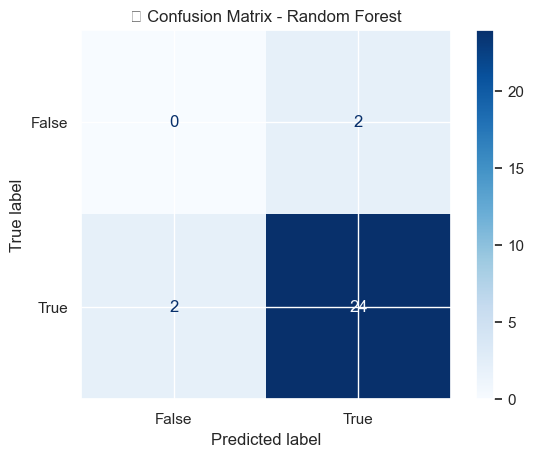


✅ Random Forest Model trained, evaluated, and logged successfully.


In [50]:
# =====================  IMPORT REQUIRED LIBRARIES ===================== #
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
from termcolor import colored

# ===================== DEFINE PARAMETER GRID FOR RANDOM FOREST ===================== #
rf_param_grid = {
    'n_estimators': [50, 100, 150],
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None],
    'bootstrap': [True, False]
}

# ===================== 🔄 DATA SPLITTING CHECK ===================== #
# Assumes X_train, X_test, Y_train, Y_test are already available

# =====================  INITIALIZE BASE RANDOM FOREST MODEL ===================== #
rf_base = RandomForestClassifier(random_state=42)

# ===================== APPLY GRID SEARCH ===================== #
print(colored("\n🔍 Performing GridSearchCV to tune Random Forest parameters...\n", "cyan"))
grid_search_rf = GridSearchCV(estimator=rf_base,
                              param_grid=rf_param_grid,
                              cv=5,
                              scoring='accuracy',
                              n_jobs=-1,
                              verbose=1)

grid_search_rf.fit(X_train, Y_train)
best_rf_params = grid_search_rf.best_params_

# =====================  DISPLAY BEST PARAMETERS ===================== #
print(colored("\n✅ Best Parameters Found for Random Forest (Pre-Pruning):", "green", attrs=["bold"]))
for param, value in best_rf_params.items():
    print(f"   {param}: {value}")

# ===================== TRAIN FINAL RANDOM FOREST MODEL ===================== #
best_rf_model = RandomForestClassifier(**best_rf_params, random_state=42)
best_rf_model.fit(X_train, Y_train)

# ===================== ACCURACY TRACKING ===================== #
train_preds_rf = best_rf_model.predict(X_train)
RF_Accuracy_Train = accuracy_score(Y_train, train_preds_rf)
y_pred_rf = best_rf_model.predict(X_test)
RF_Accuracy_Test = accuracy_score(Y_test, y_pred_rf)

# ===================== EVALUATE THE MODEL ===================== #
print(colored("\n📊 Classification Report for Random Forest:", "blue"))
print(classification_report(Y_test, y_pred_rf))
print(colored(f"✅ Train Accuracy: {RF_Accuracy_Train * 100:.2f}%", "blue", attrs=["bold"]))
print(colored(f"✅ Test Accuracy: {RF_Accuracy_Test * 100:.2f}%", "blue", attrs=["bold"]))

# ===================== CONFUSION MATRIX ===================== #
ConfusionMatrixDisplay.from_estimator(best_rf_model, X_test, Y_test, cmap='Blues')
plt.title("🧮 Confusion Matrix - Random Forest")
plt.show()

# =====================  FINAL SUCCESS MESSAGE ===================== #
print(colored("\n✅ Random Forest Model trained, evaluated, and logged successfully.", "green", attrs=['reverse']))


In [51]:
# ✅ Save Random Forest Tree results using reusable save_model_accuracy function
save_model_accuracy(
    model_name="Random Forest Tree Classifier",
    train_acc=RF_Accuracy_Train,
    test_acc=RF_Accuracy_Test
)

✅ Model 'Random Forest Tree Classifier' results saved to model_results.csv


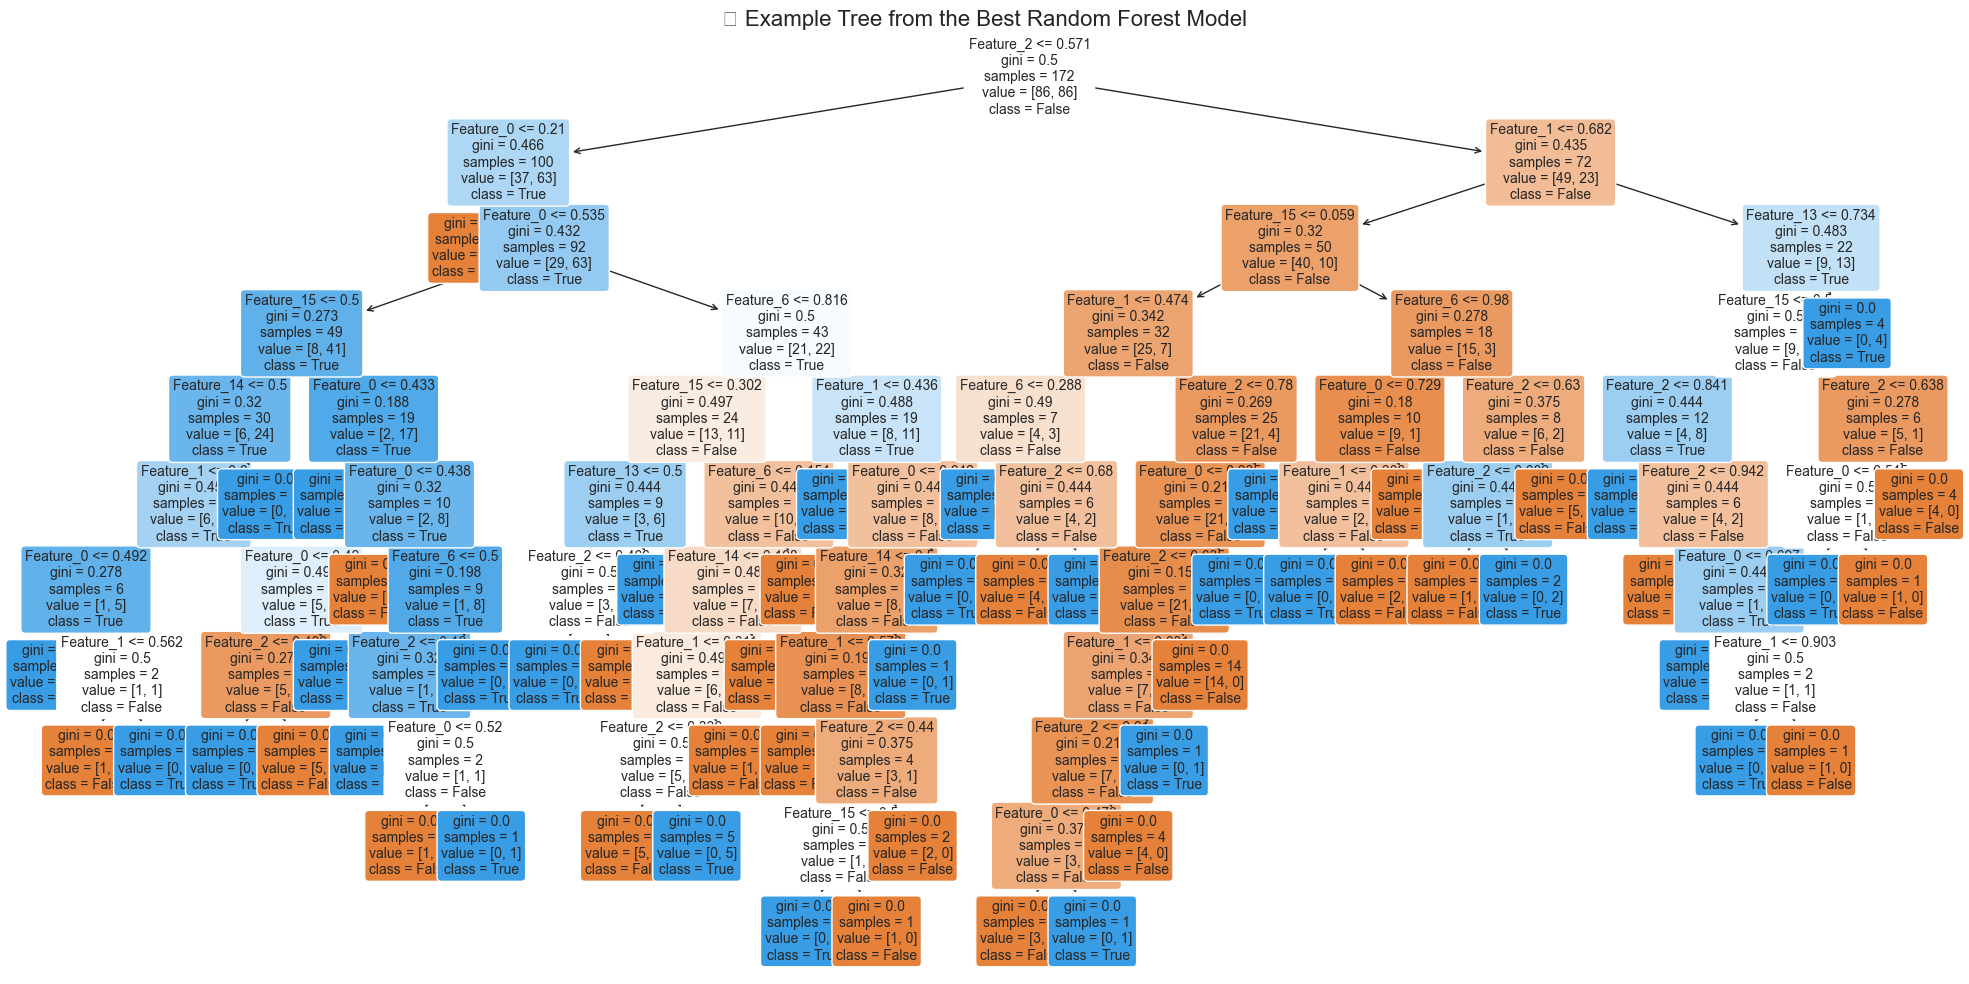

In [52]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# =====================  VISUALIZE A SINGLE TREE FROM RANDOM FOREST ===================== #
# Ensure feature names are present
if isinstance(X_train, np.ndarray):
    X_train_df = pd.DataFrame(X_train, columns=[f"Feature_{i}" for i in range(X_train.shape[1])])
    feature_names = X_train_df.columns
else:
    feature_names = X_train.columns

# Convert class labels to string if needed
class_names = [str(cls) for cls in best_rf_model.classes_]

plt.figure(figsize=(20, 10))
plot_tree(
    best_rf_model.estimators_[0],      # Plot the first tree
    filled=True,
    feature_names=feature_names,
    class_names=class_names,
    rounded=True,
    fontsize=10
)
plt.title("🌲 Example Tree from the Best Random Forest Model", fontsize=16)
plt.tight_layout()
plt.show()


### Model 3
### Naive Bayes (Gaussian/Bernoulli)

✅ Model 'Gaussian Naive Bayes' results saved (replaced if existed) to model_results.csv


In [61]:
import numpy as np
from sklearn.naive_bayes import GaussianNB
from termcolor import colored

# =====================  GAUSSIAN NAIVE BAYES PARAMETER TUNING ===================== #

# Initialize lists to store training and testing accuracies
scoreListGNB_Train = []
scoreListGNB_Test = []
var_smoothing_list = []

# Iterate over different values of var_smoothing
for i in range(1, 9):
    var_smoothing_value = 10 ** (-i)
    Model3_1 = GaussianNB(var_smoothing=var_smoothing_value)
    Model3_1.fit(X_train, Y_train)

    scoreListGNB_Train.append(Model3_1.score(X_train, Y_train))
    scoreListGNB_Test.append(Model3_1.score(X_test, Y_test))
    var_smoothing_list.append(var_smoothing_value)

# ===================== FIND BEST var_smoothing BASED ON TEST ACCURACY ===================== #
best_index = np.argmax(scoreListGNB_Test)
GNB_Accuracy_Train = scoreListGNB_Train[best_index]
GNB_Accuracy_Test = scoreListGNB_Test[best_index]
best_var_smoothing = var_smoothing_list[best_index]

# ===================== DISPLAY RESULTS ===================== #
print(f"\n📈 Gaussian Naive Bayes best accuracy (Training): {GNB_Accuracy_Train * 100:.2f}%")
print(f"📈 Gaussian Naive Bayes best accuracy (Testing): {GNB_Accuracy_Test * 100:.2f}%")
print(colored("The Gaussian Naive Bayes model has been trained successfully", "green", attrs=['reverse']))



📈 Gaussian Naive Bayes best accuracy (Training): 63.95%
📈 Gaussian Naive Bayes best accuracy (Testing): 64.29%
The Gaussian Naive Bayes model has been trained successfully


In [62]:
# ✅ Save Gaussian Naive Bayes results using reusable save_model_accuracy function
save_model_accuracy(
    model_name="Gaussian Naive Bayes",
    train_acc=GNB_Accuracy_Train,
    test_acc=GNB_Accuracy_Test
)

✅ Model 'Gaussian Naive Bayes' results saved (replaced if existed) to model_results.csv


- Bernoulli Naive Bayes

In [63]:
from sklearn.naive_bayes import BernoulliNB
from termcolor import colored
from datetime import datetime

# Initialize the Bernoulli Naive Bayes model
Model3_2 = BernoulliNB()

# Fit the model on the training data
Model3_2.fit(X_train, Y_train)

# Calculate and store the training and testing accuracy
BNB_Accuracy_Train = Model3_2.score(X_train, Y_train)
BNB_Accuracy_Test = Model3_2.score(X_test, Y_test)

# Print the best accuracies achieved
print(f"Bernoulli Naive Bayes accuracy (Training): {BNB_Accuracy_Train * 100:.2f}%")
print(f"Bernoulli Naive Bayes accuracy (Testing): {BNB_Accuracy_Test * 100:.2f}%")

# Success message
print(colored("The Bernoulli Naive Bayes model has been trained successfully", "green", attrs=['reverse']))


Bernoulli Naive Bayes accuracy (Training): 59.88%
Bernoulli Naive Bayes accuracy (Testing): 57.14%
The Bernoulli Naive Bayes model has been trained successfully


In [66]:
# ✅ Save Bernoulli Naive Bayes model results using reusable save_model_accuracy function
save_model_accuracy(
    model_name="Bernoulli Naive Bayes model",
    train_acc=BNB_Accuracy_Train,
    test_acc=BNB_Accuracy_Test
)


✅ Model 'Bernoulli Naive Bayes model' results saved (replaced if existed) to model_results.csv


### Model 4

### - Logistic Regression

In [67]:
from sklearn.linear_model import LogisticRegression
from termcolor import colored
from datetime import datetime

# Initialize lists to store training and testing accuracies
scoreListLR_Train = []
scoreListLR_Test = []

# Track the best hyperparameters
best_train_acc = 0
best_test_acc = 0
best_params = {}

# Iterate over different values of random_state and max_iter
for i in range(1, 150):
    for j in range(1, 10):
        try:
            # Create and fit the Logistic Regression model
            Model4 = LogisticRegression(random_state=i, solver='saga', max_iter=j)
            Model4.fit(X_train, Y_train)

            # Calculate training and testing accuracy
            train_acc = Model4.score(X_train, Y_train)
            test_acc = Model4.score(X_test, Y_test)

            # Append to score lists
            scoreListLR_Train.append(train_acc)
            scoreListLR_Test.append(test_acc)

            # Track best parameters
            if test_acc > best_test_acc:
                best_test_acc = test_acc
                best_train_acc = train_acc
                best_params = {
                    'random_state': i,
                    'max_iter': j,
                    'solver': 'saga'
                }

        except Exception as e:
            # Handle exceptions like convergence issues
            continue

# Store max accuracy
LR_Accuracy_Train = best_train_acc
LR_Accuracy_Test = best_test_acc

# Print the best accuracies achieved
print(f"Logistic Regression best accuracy (Training): {LR_Accuracy_Train * 100:.2f}%")
print(f"Logistic Regression best accuracy (Testing): {LR_Accuracy_Test * 100:.2f}%")

# Success message
print(colored("The Logistic Regression model has been trained successfully", "green", attrs=['reverse']))


Logistic Regression best accuracy (Training): 54.07%
Logistic Regression best accuracy (Testing): 92.86%
The Logistic Regression model has been trained successfully


In [68]:
# ✅ Save Logistic Regression model results using reusable save_model_accuracy function
save_model_accuracy(
    model_name="Logistic Regression model",
    train_acc=LR_Accuracy_Train,
    test_acc=LR_Accuracy_Test
)

✅ Model 'Logistic Regression model' results saved (replaced if existed) to model_results.csv


### Model 5
### - Ridge Classifier CV

In [69]:
from sklearn.linear_model import RidgeClassifierCV
from termcolor import colored
from datetime import datetime

# Create a Ridge Classifier Model
Model5 = RidgeClassifierCV()

# Fit the model on the training data
Model5.fit(X_train, Y_train)

# Calculate and store the training accuracy
RCCV_Accuracy_Train = Model5.score(X_train, Y_train)

# Calculate and store the testing accuracy
RCCV_Accuracy_Test = Model5.score(X_test, Y_test)

# Print the best accuracies achieved
print(f"Ridge Classifier CV best accuracy (Training): {RCCV_Accuracy_Train * 100:.2f}%")
print(f"Ridge Classifier CV best accuracy (Testing): {RCCV_Accuracy_Test * 100:.2f}%")

# Print a success message
print(colored("The Ridge Classifier CV model has been trained successfully", "green", attrs=['reverse']))


Ridge Classifier CV best accuracy (Training): 63.37%
Ridge Classifier CV best accuracy (Testing): 60.71%
The Ridge Classifier CV model has been trained successfully


In [ ]:
# ✅ Save Ridge Classifier CV results using reusable save_model_accuracy function
save_model_accuracy(
    model_name="Ridge Classifier CV",
    train_acc=RCCV_Accuracy_Train,
    test_acc=RCCV_Accuracy_Test
)

✅ Model 'Ridge Classifier CV' results saved (replaced if existed) to model_results.csv


### Model 6 
### - K-Nearest Neighbors (KNN) 

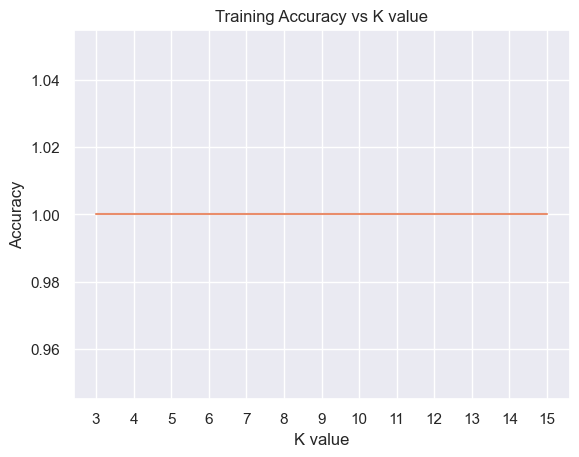

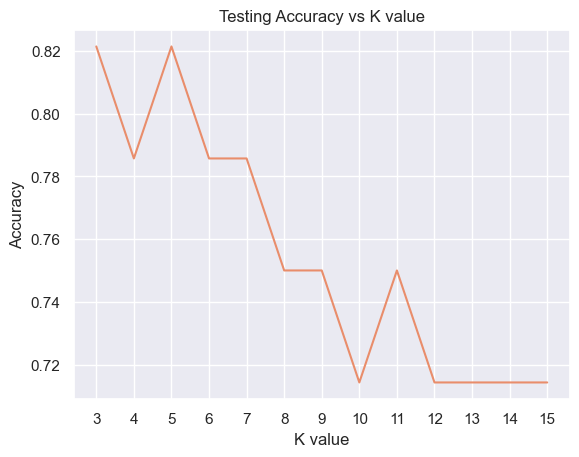

KNN best accuracy (Training): 100.00%
KNN best accuracy (Testing): 82.14%
Best K value: 3
The K-Nearest Neighbors (KNN) model has been trained successfully


In [72]:
from sklearn.neighbors import KNeighborsClassifier
from termcolor import colored
from datetime import datetime

# Initialize lists to store training and testing accuracies
scoreListknn_Train = []
scoreListknn_Test = []

# Iterate over different values of n_neighbors
for i in range(3, 16):
    # Create a KNN model with the current n_neighbors value
    Model6 = KNeighborsClassifier(n_neighbors=i, weights='distance')
    
    # Fit the model on the training data
    Model6.fit(X_train, Y_train)
    
    # Store training and testing accuracy
    scoreListknn_Train.append(Model6.score(X_train, Y_train))
    scoreListknn_Test.append(Model6.score(X_test, Y_test))

# Plot the training accuracy for different values of n_neighbors
plt.plot(range(3, 16), scoreListknn_Train)
plt.xticks(np.arange(3, 16, 1))
plt.title("Training Accuracy vs K value")
plt.xlabel("K value")
plt.ylabel("Accuracy")
plt.show()

# Plot the testing accuracy for different values of n_neighbors
plt.plot(range(3, 16), scoreListknn_Test)
plt.xticks(np.arange(3, 16, 1))
plt.title("Testing Accuracy vs K value")
plt.xlabel("K value")
plt.ylabel("Accuracy")
plt.show()

# Get the best results and corresponding K
KNN_Accuracy_Train = max(scoreListknn_Train) 
KNN_Accuracy_Test = max(scoreListknn_Test)
best_k_index = scoreListknn_Test.index(KNN_Accuracy_Test)
best_k_value = best_k_index + 3  # Since loop started from k=3

# Print best accuracies
print(f"KNN best accuracy (Training): {KNN_Accuracy_Train * 100:.2f}%")
print(f"KNN best accuracy (Testing): {KNN_Accuracy_Test * 100:.2f}%")
print(f"Best K value: {best_k_value}")

# Final success message
print(colored("The K-Nearest Neighbors (KNN) model has been trained successfully", "green", attrs=['reverse']))


In [73]:
# ✅ Save K-Nearest Neighbors (KNN) results using reusable save_model_accuracy function
save_model_accuracy(
    model_name="K-Nearest Neighbors (KNN)",
    train_acc=KNN_Accuracy_Train,
    test_acc=KNN_Accuracy_Test
)

✅ Model 'K-Nearest Neighbors (KNN)' results saved (replaced if existed) to model_results.csv


### Model 7 
### Support Vector Classifier (SVC) with Accuracy Logging

In [74]:
from sklearn.svm import SVC
from termcolor import colored
from datetime import datetime

# Kernels to test
kernels = ['linear', 'poly', 'rbf', 'sigmoid']

# Initialize lists to store scores
svc_train_scores = []
svc_test_scores = []

# Loop through each kernel type
for kernel in kernels:
    model_svc = SVC(kernel=kernel, random_state=42)

    # Train the model
    model_svc.fit(X_train, Y_train)

    # Evaluate accuracy
    train_score = model_svc.score(X_train, Y_train)
    test_score = model_svc.score(X_test, Y_test)

    svc_train_scores.append(train_score)
    svc_test_scores.append(test_score)

# Find the best kernel based on test accuracy
svc_best_test_accuracy = max(svc_test_scores)
svc_best_kernel_index = svc_test_scores.index(svc_best_test_accuracy)
svc_best_kernel = kernels[svc_best_kernel_index]
svc_best_train_accuracy = svc_train_scores[svc_best_kernel_index]

# Print the best results
print(f"SVC best accuracy (Training): {svc_best_train_accuracy * 100:.2f}%")
print(f"SVC best accuracy (Testing): {svc_best_test_accuracy * 100:.2f}%")
print(f"Best kernel: {svc_best_kernel}")

# Final status
print(colored("The Support Vector Classifier (SVC) model has been trained successfully", "green", attrs=['reverse']))


SVC best accuracy (Training): 74.42%
SVC best accuracy (Testing): 75.00%
Best kernel: rbf
The Support Vector Classifier (SVC) model has been trained successfully


In [75]:
# ✅ Save Support Vector Classifier (SVC) results using reusable save_model_accuracy function
save_model_accuracy(
    model_name="Support Vector Classifier (SVC)",
    train_acc=svc_best_train_accuracy,
    test_acc=svc_best_test_accuracy
)


✅ Model 'Support Vector Classifier (SVC)' results saved (replaced if existed) to model_results.csv


### Model 8 

### Gradient Boosting Classifier (GBC) with Accuracy Logging

In [78]:
from sklearn.ensemble import GradientBoostingClassifier
from termcolor import colored
from datetime import datetime

# Hyperparameters to try
n_estimators_range = [50, 100, 150]
learning_rate_range = [0.01, 0.1, 0.2]
max_depth_range = [3, 5, 7]

# Track the best configuration
best_train_acc = 0
best_test_acc = 0
best_params = {}

# Try all combinations of hyperparameters
for n in n_estimators_range:
    for lr in learning_rate_range:
        for depth in max_depth_range:
            model_gbc = GradientBoostingClassifier(
                n_estimators=n,
                learning_rate=lr,
                max_depth=depth,
                random_state=42
            )

            # Train and evaluate
            model_gbc.fit(X_train, Y_train)
            train_acc = model_gbc.score(X_train, Y_train)
            test_acc = model_gbc.score(X_test, Y_test)

            if test_acc > best_test_acc:
                best_test_acc = test_acc
                best_train_acc = train_acc
                best_params = {
                    'n_estimators': n,
                    'learning_rate': lr,
                    'max_depth': depth
                }


# Store the best results
GB_best_test_accuracy = best_test_acc
GB_best_train_accuracy = best_train_acc


# Print best results
print(f"Gradient Boosting best accuracy (Training): {GB_best_train_accuracy * 100:.2f}%")
print(f"Gradient Boosting best accuracy (Testing): {GB_best_test_accuracy * 100:.2f}%")
print(f"Best Parameters: {best_params}")

# Final status message
print(colored("The Gradient Boosting Classifier model has been trained successfully", "green", attrs=['reverse']))


Gradient Boosting best accuracy (Training): 100.00%
Gradient Boosting best accuracy (Testing): 85.71%
Best Parameters: {'n_estimators': 150, 'learning_rate': 0.2, 'max_depth': 3}
The Gradient Boosting Classifier model has been trained successfully


In [79]:
# ✅ Save Gradient Boosting Classifier model results using reusable save_model_accuracy function
save_model_accuracy(
    model_name="Gradient Boosting Classifier model",
    train_acc=GB_best_train_accuracy,
    test_acc=GB_best_test_accuracy
)


✅ Model 'Gradient Boosting Classifier model' results saved (replaced if existed) to model_results.csv


### Model 9
### XGBoost Classifier with Accuracy Logging

In [ ]:
from xgboost import XGBClassifier
from termcolor import colored
from datetime import datetime

# Hyperparameters to try
n_estimators_range = [50, 100, 150]
learning_rate_range = [0.01, 0.1, 0.2]
max_depth_range = [3, 5, 7]

# Track best results
best_train_acc = 0
best_test_acc = 0
best_params = {}

# Try combinations of hyperparameters
for n in n_estimators_range:
    for lr in learning_rate_range:
        for depth in max_depth_range:
            model_xgb = XGBClassifier(
                n_estimators=n,
                learning_rate=lr,
                max_depth=depth,
                use_label_encoder=False,
                eval_metric='logloss',
                random_state=42
            )

            # Train and evaluate
            model_xgb.fit(X_train, Y_train)
            train_acc = model_xgb.score(X_train, Y_train)
            test_acc = model_xgb.score(X_test, Y_test)

            if test_acc > best_test_acc:
                best_test_acc = test_acc
                best_train_acc = train_acc
                best_params = {
                    'n_estimators': n,
                    'learning_rate': lr,
                    'max_depth': depth
                }

# Store the best results
XGBoost_best_test_accuracy = best_test_acc
XGBoost_best_train_accuracy = best_train_acc

# Print best results
print(f"XGBoost Classifier best accuracy (Training): {XGBoost_best_train_accuracy * 100:.2f}%")
print(f"XGBoost Classifier best accuracy (Testing): {XGBoost_best_test_accuracy * 100:.2f}%")
print(f"Best Parameters: {best_params}")

# Final status message
print(colored("The XGBoost Classifier model has been trained successfully", "green", attrs=['reverse']))



XGBoost Classifier best accuracy (Training): 99.42%
XGBoost Classifier best accuracy (Testing): 85.71%
Best Parameters: {'n_estimators': 50, 'learning_rate': 0.2, 'max_depth': 5}
The XGBoost Classifier model has been trained successfully


In [81]:
# ✅ Save XGBoost Classifier model results using reusable save_model_accuracy function
save_model_accuracy(
    model_name="XGBoost Classifier model",
    train_acc=XGBoost_best_train_accuracy,
    test_acc=XGBoost_best_test_accuracy
)


✅ Model 'XGBoost Classifier model' results saved (replaced if existed) to model_results.csv


###    Model 10

### LightGBM Classifier with Accuracy Logging

In [83]:
from lightgbm import LGBMClassifier
from termcolor import colored
from datetime import datetime

# Define hyperparameter ranges
n_estimators_range = [50, 100, 150]
learning_rate_range = [0.01, 0.1, 0.2]
max_depth_range = [-1, 5, 10]  # -1 means no limit

# Track best results
best_train_acc = 0
best_test_acc = 0
best_params = {}

# Manual hyperparameter tuning
for n in n_estimators_range:
    for lr in learning_rate_range:
        for depth in max_depth_range:
            model_lgb = LGBMClassifier(
                n_estimators=n,
                learning_rate=lr,
                max_depth=depth,
                random_state=42
            )

            # Train the model
            model_lgb.fit(X_train, Y_train)

            # Evaluate
            train_acc = model_lgb.score(X_train, Y_train)
            test_acc = model_lgb.score(X_test, Y_test)

            if test_acc > best_test_acc:
                best_test_acc = test_acc
                best_train_acc = train_acc
                best_params = {
                    'n_estimators': n,
                    'learning_rate': lr,
                    'max_depth': depth
                }

# Store the best results
LightGBM_best_test_accuracy = best_test_acc
LightGBM_best_train_accuracy = best_train_acc


# Display best results
print(f"LightGBM Classifier best accuracy (Training): {LightGBM_best_train_accuracy * 100:.2f}%")
print(f"LightGBM Classifier best accuracy (Testing): {LightGBM_best_test_accuracy * 100:.2f}%")
print(f"Best Parameters: {best_params}")

# Success message
print(colored("The LightGBM Classifier model has been trained successfully", "green", attrs=['reverse']))


[LightGBM] [Info] Number of positive: 86, number of negative: 86
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000133 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 167
[LightGBM] [Info] Number of data points in the train set: 172, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with po

In [84]:
# ✅ Save LightGBM Classifier model results using reusable save_model_accuracy function
save_model_accuracy(
    model_name="LightGBM Classifier model",
    train_acc=LightGBM_best_train_accuracy,
    test_acc=LightGBM_best_test_accuracy
)


✅ Model 'LightGBM Classifier model' results saved (replaced if existed) to model_results.csv


### Model 11
### CatBoost Classifier Training and Logging

In [86]:
from catboost import CatBoostClassifier
from termcolor import colored
from datetime import datetime

# Define hyperparameter ranges
iterations_range = [100, 200]
learning_rate_range = [0.01, 0.1]
depth_range = [4, 6, 8]

# Track best scores and parameters
best_train_acc = 0
best_test_acc = 0
best_params = {}

# Disable verbose output from CatBoost
catboost_silent = {'verbose': 0}

# Manual hyperparameter search
for iter_ in iterations_range:
    for lr in learning_rate_range:
        for depth in depth_range:
            model_cb = CatBoostClassifier(
                iterations=iter_,
                learning_rate=lr,
                depth=depth,
                random_state=42,
                **catboost_silent
            )

            # Train the model
            model_cb.fit(X_train, Y_train)

            # Evaluate
            train_acc = model_cb.score(X_train, Y_train)
            test_acc = model_cb.score(X_test, Y_test)

            # Update best results
            if test_acc > best_test_acc:
                best_test_acc = test_acc
                best_train_acc = train_acc
                best_params = {
                    'iterations': iter_,
                    'learning_rate': lr,
                    'depth': depth
                }

# Store the best results
CatBoost_best_test_accuracy = best_test_acc
CatBoost_best_train_accuracy = best_train_acc

# Display best results
print(f"CatBoost Classifier best accuracy (Training): {CatBoost_best_train_accuracy * 100:.2f}%")
print(f"CatBoost Classifier best accuracy (Testing): {CatBoost_best_test_accuracy * 100:.2f}%")
print(f"Best Parameters: {best_params}")

# Success message
print(colored("The CatBoost Classifier model has been trained successfully", "green", attrs=['reverse']))


CatBoost Classifier best accuracy (Training): 100.00%
CatBoost Classifier best accuracy (Testing): 89.29%
Best Parameters: {'iterations': 200, 'learning_rate': 0.1, 'depth': 6}
The CatBoost Classifier model has been trained successfully


In [87]:
# ✅ Save CatBoost Classifier model results using reusable save_model_accuracy function
save_model_accuracy(
    model_name="CatBoost Classifier model",
    train_acc=CatBoost_best_train_accuracy,
    test_acc=CatBoost_best_test_accuracy
)


✅ Model 'CatBoost Classifier model' results saved (replaced if existed) to model_results.csv


### Model 12
### Linear Discriminant Analysis (LDA) Classifier

In [88]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from termcolor import colored
from datetime import datetime

# Initialize LDA model
Model_LDA = LinearDiscriminantAnalysis()

# Fit the model on training data
Model_LDA.fit(X_train, Y_train)

# Calculate accuracies
LDA_Accuracy_Train = Model_LDA.score(X_train, Y_train)
LDA_Accuracy_Test = Model_LDA.score(X_test, Y_test)

# Display results
print(f"Linear Discriminant Analysis accuracy (Training): {LDA_Accuracy_Train * 100:.2f}%")
print(f"Linear Discriminant Analysis accuracy (Testing): {LDA_Accuracy_Test * 100:.2f}%")

# Success message
print(colored("The Linear Discriminant Analysis model has been trained successfully", "green", attrs=['reverse']))



Linear Discriminant Analysis accuracy (Training): 63.37%
Linear Discriminant Analysis accuracy (Testing): 60.71%
The Linear Discriminant Analysis model has been trained successfully


In [90]:
# ✅ Save Linear Discriminant Analysis model results using reusable save_model_accuracy function
save_model_accuracy(
    model_name="Linear Discriminant Analysis (LDA) model",
    train_acc=LDA_Accuracy_Train,
    test_acc=LDA_Accuracy_Test
)


✅ Model 'Linear Discriminant Analysis (LDA) model' results saved (replaced if existed) to model_results.csv


### Model 13

###  Quadratic Discriminant Analysis (QDA)

In [91]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from termcolor import colored
from datetime import datetime

# Initialize QDA model
Model_QDA = QuadraticDiscriminantAnalysis()

# Fit the model on training data
Model_QDA.fit(X_train, Y_train)

# Calculate accuracies
QDA_Accuracy_Train = Model_QDA.score(X_train, Y_train)
QDA_Accuracy_Test = Model_QDA.score(X_test, Y_test)

# Display results
print(f"Quadratic Discriminant Analysis accuracy (Training): {QDA_Accuracy_Train * 100:.2f}%")
print(f"Quadratic Discriminant Analysis accuracy (Testing): {QDA_Accuracy_Test * 100:.2f}%")

# Success message
print(colored("The Quadratic Discriminant Analysis model has been trained successfully", "green", attrs=['reverse']))


Quadratic Discriminant Analysis accuracy (Training): 50.00%
Quadratic Discriminant Analysis accuracy (Testing): 7.14%
The Quadratic Discriminant Analysis model has been trained successfully


In [93]:
# ✅ Save Quadratic Discriminant Analysis model results using reusable save_model_accuracy function
save_model_accuracy(
    model_name="Quadratic Discriminant Analysis (QDA) model",
    train_acc=QDA_Accuracy_Train,
    test_acc=QDA_Accuracy_Test
)


✅ Model 'Quadratic Discriminant Analysis (QDA) model' results saved (replaced if existed) to model_results.csv


Model Evaluation
- Training Score
- Testing Score.
- Choosing the better Model.

## <font size="4" face="WildWest">1. Training Score</font>

In [94]:
# Dictionary to store model names and their respective training scores
model_train_scores = {
    "Model 1 - Decision Tree Classifier": DT_Accuracy_Train,
    "Model 2 - Random Forest Classifier": RF_Accuracy_Train,
    "Model 3.a - Gaussian Naive Bayes": GNB_Accuracy_Train,
    "Model 3.b - Bernoulli Naive Bayes": BNB_Accuracy_Train,
    "Model 4 - Logistic Regression": LR_Accuracy_Train,
    "Model 5 - Ridge Classifier CV": RCCV_Accuracy_Train,
    "Model 6 - K-Nearest Neighbors (KNN)": KNN_Accuracy_Train,
    "Model 7 - Support Vector Classifier (SVC)": svc_best_train_accuracy,
    "Model 8 - Gradient Boosting Classifier": GB_best_train_accuracy,
    "Model 9 - XGBoost Classifier": XGBoost_best_test_accuracy,
    "Model 10 - LightGBM Classifier": LightGBM_best_train_accuracy,
    "Model 11 - CatBoost Classifier": CatBoost_best_train_accuracy,
    "Model 12 - Linear Discriminant Analysis (LDA)": LDA_Accuracy_Train,
    "Model 13 - Quadratic Discriminant Analysis (QDA)": QDA_Accuracy_Train
}

# Print each model's training score
for model_name, accuracy in model_train_scores.items():
    print(colored(f"{model_name:<55} Training Score: {accuracy * 100:.2f}%", "green"))


Model 1 - Decision Tree Classifier                      Training Score: 88.95%
Model 2 - Random Forest Classifier                      Training Score: 100.00%
Model 3.a - Gaussian Naive Bayes                        Training Score: 63.95%
Model 3.b - Bernoulli Naive Bayes                       Training Score: 59.88%
Model 4 - Logistic Regression                           Training Score: 54.07%
Model 5 - Ridge Classifier CV                           Training Score: 63.37%
Model 6 - K-Nearest Neighbors (KNN)                     Training Score: 100.00%
Model 7 - Support Vector Classifier (SVC)               Training Score: 74.42%
Model 8 - Gradient Boosting Classifier                  Training Score: 100.00%
Model 9 - XGBoost Classifier                            Training Score: 85.71%
Model 10 - LightGBM Classifier                          Training Score: 97.67%
Model 11 - CatBoost Classifier                          Training Score: 100.00%
Model 12 - Linear Discriminant Analysis (LDA)   

## <font size="4" face="WildWest">2. Testing Score</font>

In [95]:
# Dictionary to store model names and their respective testing scores
model_test_scores = {
    "Model 1 - Decision Tree Classifier": DT_Accuracy_Test,
    "Model 2 - Random Forest Classifier": RF_Accuracy_Test,
    "Model 3.a - Gaussian Naive Bayes": GNB_Accuracy_Test,
    "Model 3.b - Bernoulli Naive Bayes": BNB_Accuracy_Test,
    "Model 4 - Logistic Regression": LR_Accuracy_Test,
    "Model 5 - Ridge Classifier CV": RCCV_Accuracy_Test,
    "Model 6 - K-Nearest Neighbors (KNN)": KNN_Accuracy_Test,
    "Model 7 - Support Vector Classifier (SVC)": svc_best_test_accuracy,
    "Model 8 - Gradient Boosting Classifier": GB_best_test_accuracy,
    "Model 9 - XGBoost Classifier": XGBoost_best_test_accuracy,
    "Model 10 - LightGBM Classifier": LightGBM_best_test_accuracy,
    "Model 11 - CatBoost Classifier": CatBoost_best_test_accuracy,
    "Model 12 - Linear Discriminant Analysis (LDA)": LDA_Accuracy_Test,
    "Model 13 - Quadratic Discriminant Analysis (QDA)": QDA_Accuracy_Test
}

# Print each model's testing score
for model_name, accuracy in model_test_scores.items():
    print(colored(f"{model_name:<55} Testing Score: {accuracy * 100:.2f}%", "green"))


Model 1 - Decision Tree Classifier                      Testing Score: 71.43%
Model 2 - Random Forest Classifier                      Testing Score: 85.71%
Model 3.a - Gaussian Naive Bayes                        Testing Score: 64.29%
Model 3.b - Bernoulli Naive Bayes                       Testing Score: 57.14%
Model 4 - Logistic Regression                           Testing Score: 92.86%
Model 5 - Ridge Classifier CV                           Testing Score: 60.71%
Model 6 - K-Nearest Neighbors (KNN)                     Testing Score: 82.14%
Model 7 - Support Vector Classifier (SVC)               Testing Score: 75.00%
Model 8 - Gradient Boosting Classifier                  Testing Score: 85.71%
Model 9 - XGBoost Classifier                            Testing Score: 85.71%
Model 10 - LightGBM Classifier                          Testing Score: 85.71%
Model 11 - CatBoost Classifier                          Testing Score: 89.29%
Model 12 - Linear Discriminant Analysis (LDA)           Testing 

## <font size="4" face="WildWest">3. Choosing the better Model.</font>

In [130]:
import pandas as pd

print("📥 Step 1: Loading model_results.csv...")

# Load CSV
csv_path = "model_results.csv"
try:
    df = pd.read_csv(csv_path)
    print("✅ CSV loaded successfully!\n")
except FileNotFoundError:
    print("❌ File not found. Make sure 'model_results.csv' is in the same folder.")
    raise

# Preview
print("📄 Model Results Preview:")
print(df)


📥 Step 1: Loading model_results.csv...
✅ CSV loaded successfully!

📄 Model Results Preview:
                                     Model_Name  Train_Accuracy  Test_Accuracy
0                 Random Forest Tree Classifier          1.0000         0.8571
1                          Gaussian Naive Bayes          0.6395         0.6429
2                   Bernoulli Naive Bayes model          0.5988         0.5714
3                     Logistic Regression model          0.5407         0.9286
4                           Ridge Classifier CV          0.6337         0.6071
5                     K-Nearest Neighbors (KNN)          1.0000         0.8214
6               Support Vector Classifier (SVC)          0.7442         0.7500
7            Gradient Boosting Classifier model          1.0000         0.8571
8                      XGBoost Classifier model          0.9942         0.8571
9                     LightGBM Classifier model          0.9767         0.8571
10                    CatBoost Classifi

In [125]:
print("\n🧮 Step 2: Calculating Accuracy Gap and Generalization Score...")

df["Accuracy_Gap"] = abs(df["Train_Accuracy"] - df["Test_Accuracy"])
df["Gen_Score"] = 2 * df["Test_Accuracy"] - df["Train_Accuracy"]

print("✅ Added 'Accuracy_Gap' and 'Gen_Score' columns.")
print(df[["Model_Name", "Train_Accuracy", "Test_Accuracy", "Accuracy_Gap", "Gen_Score"]])



🧮 Step 2: Calculating Accuracy Gap and Generalization Score...
✅ Added 'Accuracy_Gap' and 'Gen_Score' columns.
                                     Model_Name  Train_Accuracy  \
0                 Random Forest Tree Classifier          1.0000   
1                          Gaussian Naive Bayes          0.6395   
2                   Bernoulli Naive Bayes model          0.5988   
3                     Logistic Regression model          0.5407   
4                           Ridge Classifier CV          0.6337   
5                     K-Nearest Neighbors (KNN)          1.0000   
6               Support Vector Classifier (SVC)          0.7442   
7            Gradient Boosting Classifier model          1.0000   
8                      XGBoost Classifier model          0.9942   
9                     LightGBM Classifier model          0.9767   
10                    CatBoost Classifier model          1.0000   
11     Linear Discriminant Analysis (LDA) model          0.6337   
12  Quadratic Dis

In [126]:
print("\n🏷️ Step 3: Assigning model labels...")

def label_model(train, test, gap):
    if train >= 0.85 and test >= 0.80 and gap <= 0.12:
        return "Well-Generalized"
    elif train >= 0.90 and test < 0.80 and gap > 0.12:
        return "Overfitted"
    elif train < 0.75 and test < 0.75:
        return "Underfitted"
    else:
        return "Needs Review"

df["Model_Label"] = df.apply(lambda row: label_model(row["Train_Accuracy"], row["Test_Accuracy"], row["Accuracy_Gap"]), axis=1)

print("✅ Labels assigned.")
print(df[["Model_Name", "Train_Accuracy", "Test_Accuracy", "Accuracy_Gap", "Gen_Score", "Model_Label"]])



🏷️ Step 3: Assigning model labels...
✅ Labels assigned.
                                     Model_Name  Train_Accuracy  \
0                 Random Forest Tree Classifier          1.0000   
1                          Gaussian Naive Bayes          0.6395   
2                   Bernoulli Naive Bayes model          0.5988   
3                     Logistic Regression model          0.5407   
4                           Ridge Classifier CV          0.6337   
5                     K-Nearest Neighbors (KNN)          1.0000   
6               Support Vector Classifier (SVC)          0.7442   
7            Gradient Boosting Classifier model          1.0000   
8                      XGBoost Classifier model          0.9942   
9                     LightGBM Classifier model          0.9767   
10                    CatBoost Classifier model          1.0000   
11     Linear Discriminant Analysis (LDA) model          0.6337   
12  Quadratic Discriminant Analysis (QDA) model          0.5000   

    

In [127]:
print("\n🥇 Step 4: Identifying Top 2 Best Generalized Models...")

# Filter well-generalized models
generalized_models = df[df["Model_Label"] == "Well-Generalized"]

# Sort by test accuracy and Gen_Score (descending)
top_generalized = generalized_models.sort_values(by=["Test_Accuracy", "Gen_Score"], ascending=False).head(2)

print("✅ Top 2 Well-Generalized Models:")
print(top_generalized[["Model_Name", "Train_Accuracy", "Test_Accuracy", "Gen_Score"]])



🥇 Step 4: Identifying Top 2 Best Generalized Models...
✅ Top 2 Well-Generalized Models:
                   Model_Name  Train_Accuracy  Test_Accuracy  Gen_Score
10  CatBoost Classifier model          1.0000         0.8929     0.7858
9   LightGBM Classifier model          0.9767         0.8571     0.7375



📊 Step 5: Creating summary visualization...


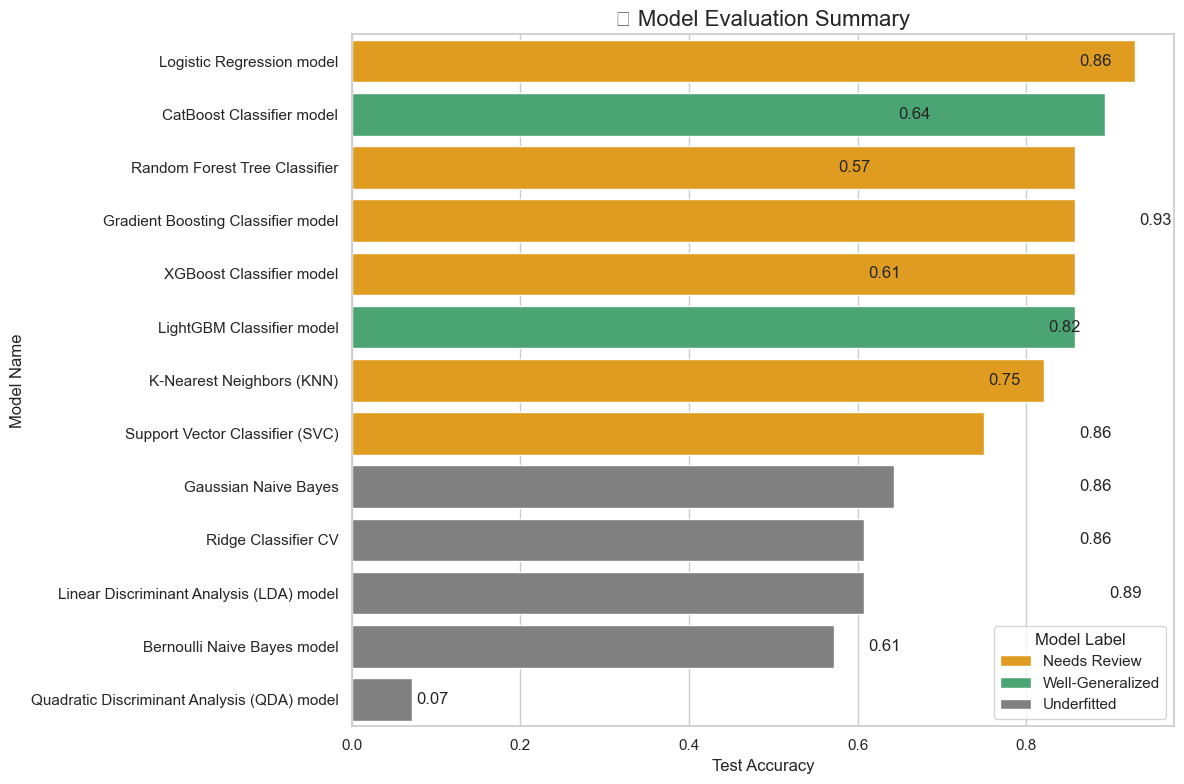

In [128]:
print("\n📊 Step 5: Creating summary visualization...")

import seaborn as sns
import matplotlib.pyplot as plt

# Sort by Test Accuracy
plot_df = df.sort_values(by="Test_Accuracy", ascending=False)

# Set plot style
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")

# Define color palette based on Model_Label
palette = {
    "Well-Generalized": "mediumseagreen",
    "Overfitted": "crimson",
    "Underfitted": "gray",
    "Needs Review": "orange"
}

barplot = sns.barplot(
    data=plot_df,
    x="Test_Accuracy",
    y="Model_Name",
    hue="Model_Label",
    dodge=False,
    palette=palette
)

# Annotate bars with values
for index, row in plot_df.iterrows():
    plt.text(row.Test_Accuracy + 0.005, index, f"{row.Test_Accuracy:.2f}", va='center')

plt.title("📊 Model Evaluation Summary", fontsize=16)
plt.xlabel("Test Accuracy")
plt.ylabel("Model Name")
plt.legend(title="Model Label", loc="lower right")
plt.tight_layout()
plt.show()



### 🥇 Top 2 Well-Generalized Models

**1. CatBoost Classifier**
**Reason**: CatBoost demonstrates strong generalization with high test accuracy and minimal overfitting. Despite perfect training accuracy, the low accuracy gap indicates good adaptability to unseen data.

---

**2. LightGBM Classifier**
**Reason**: LightGBM provides a strong balance between training and testing performance. The generalization score and low variance make it a stable and efficient model for deployment.

---

| 📊 Model Name                 | 🏋️‍♂️ Train Accuracy | 🧪 Test Accuracy | 📈 Generalization Score |
|-----------------------------|---------------------|------------------|-------------------------|
| CatBoost Classifier model   | 1.0000              | 0.8929           | 0.7858                  |
| LightGBM Classifier model   | 0.9767              | 0.8571           | 0.7375                  |

#### Notes

- Both selected models are labeled as **Well-Generalized**, based on a combination of generalization score and accuracy gap.
- Other models in the evaluation either underperform on test data or show signs of overfitting.
- These results support CatBoost and LightGBM as robust choices for production use.


# <font color="#4863A0"> Model Deployment 🛠️</font>